#  Analyse spectra ADR holo at AuxTel for Configuration PSF1D REBIN = 2

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : June 27th  2022
- last update : June 27th 2022

- **kernel anaconda3_auxtel** at CC or **python 3** locally


## ANalyse ADR subtraction

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

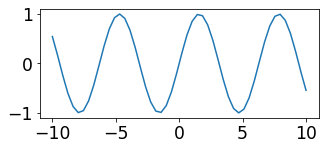

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-07-10'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.8.4'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor, dumpParameters, FullForwardModelFitWorkspace,  run_ffm_minimisation, plot_comparison_truth,dumpfitparameters
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config,set_logger
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
import logging

In [13]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [14]:
from time import sleep

In [15]:
from astropy.time import Time
import astropy.units as u

In [16]:
import pickle

# Function

In [17]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [19]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [20]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [21]:
my_logger = logging

In [22]:
# path index for each month
DATE="20220316"
#DATE="20211104"
filterdispersername = "empty~holo4_003"
#filterdispersername = "BG40~holo4_003"
imagemode = "postISRCCD"
#imagemode = "unflattened"

In [23]:
version="v5.0"

In [24]:
# Choose the config filename
list_of_spectractorconfigfiles= ['auxtel_config_holo_DECONVOLUTION_PSF1D.ini' ,
                                 'auxtel_config_holo_DECONVOLUTION_PSF2D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_FFM.ini',
                                 'auxtel_config_holo_DECONVOLUTION_PSF2DFFM.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2FFM.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DFFM300650.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF2D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotA.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotB.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotC.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotD.ini']
config_idx = 5    

configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
#configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]
configdir = "config_" + (list_of_spectractorconfigfiles[config_idx].split("auxtel_config_holo_")[-1]).split(".") [0]

In [25]:
configdir 

'config_DECONVOLUTION_REBIN2FFM'

In [26]:
load_config(configfilename)

In [27]:
#parameters.LAMBDA_MAX=700
#parameters.LAMBDA_MIN=300

In [28]:
dumpParameters()

ASTROMETRYNET_DIR 
BGD_ORDER 1
CALIB_BGD_NPARAMS 4
CALIB_BGD_ORDER 3
CALIB_BGD_WIDTH 15
CALIB_PEAK_WIDTH 7
CALIB_SAVGOL_ORDER 2
CALIB_SAVGOL_WINDOW 5
CCD_ARCSEC2RADIANS 4.84813681109536e-06
CCD_GAIN 1.1
CCD_IMSIZE 2048
CCD_MAXADU 170000
CCD_PIXEL2ARCSEC 0.1904
CCD_PIXEL2MM 0.02
CCD_REBIN 2
CONFIG_DIR /Users/dagoret/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/../config/
DEBUG False
DEBUG_LOGGING False
DISPERSER_DIR /Users/dagoret/anaconda3/lib/python3.9/site-packages/Spectractor-2.1-py3.9.egg/spectractor/extractor/dispersers/
DISPLAY True
DISTANCE2CCD 175
DISTANCE2CCD_ERR 0.75
FGB37 {'label': 'FGB37', 'min': 350, 'max': 750}
FILTERS [{'label': 'RG715', 'min': 690, 'max': 1100}, {'label': 'FGB37', 'min': 350, 'max': 750}, {'label': 'Halfa', 'min': 0.0006431, 'max': 0.0006686999999999999}, {'label': 'Z-Gunn', 'min': 800, 'max': 1100}]
FLAM_TO_ADURATE 5175865186660.421
GRATING_ORDER_2OVER1 0.1
GROOVES_PER_MM 350
HALPHA_CENTER 0.0006559
HALPHA_FILTER {'label'

In [29]:
configmode = list_of_spectractorconfigfiles[config_idx].split("auxtel_config_holo_DECONVOLUTION_")[-1].split(".") [0]
configmode

'REBIN2FFM'

# Path

In [30]:
HOSTCC=False
LAPTOP=True

In [31]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
        path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
        path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)

else:
    if not LAPTOP:
        path_auxtel="/Users/sylvie/DATA/AuxTelData2022"
        path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
        path_spectractor_config=os.path.join(path_spectractor,"config")
        path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
        if configdir == "":
            path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
        else:
            path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
            path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
            path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
            path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)
    else:
        path_auxtel="/Users/dagoret/DATA/AuxTelData2022"
        path_spectractor=os.path.join(path_auxtel,"/Users/dagoret/MacOSX/GitHub/LSST/Spectractor")
        path_spectractor_config=os.path.join(path_spectractor,"config")
        path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
        if configdir == "":
            path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
        else:
            path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
            path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
            path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
            path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)
                

In [32]:
path_output_spectractor

'/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316'

In [33]:
! ls -l $path_output_spectractor

total 0
drwxr-xr-x  4 dagoret  staff  128 Jul 10 12:23 2022031600330
drwxr-xr-x  4 dagoret  staff  128 Jul  9 15:19 2022031600337
drwxr-xr-x  4 dagoret  staff  128 Jul  9 16:10 2022031600344
drwxr-xr-x  4 dagoret  staff  128 Jul  9 16:40 2022031600345
drwxr-xr-x  4 dagoret  staff  128 Jul  9 19:07 2022031600351
drwxr-xr-x  4 dagoret  staff  128 Jul  9 20:12 2022031600352
drwxr-xr-x  4 dagoret  staff  128 Jul  9 20:36 2022031600358
drwxr-xr-x  4 dagoret  staff  128 Jul  9 21:58 2022031600359
drwxr-xr-x  4 dagoret  staff  128 Jul  9 22:22 2022031600365


In [34]:
# standard configuration for spectractor
#config = os.path.join(path_spectractor_config,"auxtel.ini")
#config=os.path.join("./config",configfilename)
config=configfilename
print(f">>>>> Spectractor configuration filename : {configfilename}")

>>>>> Spectractor configuration filename : ./config/auxtel_config_holo_DECONVOLUTION_REBIN2FFM.ini


In [35]:
load_config(configfilename)

## Logbook for file selection

In [36]:
filename_logbook='logbooks/auxtellogbook_'+filterdispersername+"_"+DATE+'_' + version+'.csv'

In [37]:
df=pd.read_csv(filename_logbook,index_col=0)

In [38]:
pd.set_option('display.max_rows', None)

In [39]:
df

index                     date  \
0       0  2022-03-17T01:59:37.776   
1       1  2022-03-17T02:00:10.693   
2       2  2022-03-17T02:03:04.275   
3       3  2022-03-17T02:03:37.365   
4       4  2022-03-17T02:06:31.026   
5       5  2022-03-17T02:07:03.927   
6       6  2022-03-17T02:11:00.681   
7       7  2022-03-17T02:11:33.581   
8       8  2022-03-17T02:14:30.261   
9       9  2022-03-17T02:15:03.181   
10     10  2022-03-17T02:17:59.397   
11     11  2022-03-17T02:18:32.481   
12     12  2022-03-17T02:22:39.026   
13     13  2022-03-17T02:23:12.104   
14     14  2022-03-17T02:26:07.782   
15     15  2022-03-17T02:26:40.735   
16     16  2022-03-17T02:29:37.041   
17     17  2022-03-17T02:30:10.043   
18     18  2022-03-17T02:34:15.754   
19     19  2022-03-17T02:34:48.848   
20     20  2022-03-17T02:38:56.232   
21     21  2022-03-17T02:39:29.123   
22     22  2022-03-17T03:11:58.564   
23     23  2022-03-17T03:12:31.562   
24     24  2022-03-17T03:15:28.519   
25     25  2022-03-17T03:16:01.707   
26     26  2022-03-17T03:21:49.842   
27     27  2022-03-17T03:22:22.856   

                                                 path  \
0   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
1   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
2   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
3   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
4   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
5   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
6   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
7   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
8   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
9   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
10  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
11  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
12  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
13  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
14  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
15  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
16  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
17  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
18  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
19  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
20  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
21  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
22  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
23  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
24  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
25  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
26  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
27  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   

                                      file  num    object   filter  disperser  \
0   exposure_2022031600330_postisrccd.fits  330   eta dor  empty_1  holo4_003   
1   exposure_2022031600331_postisrccd.fits  331   eta dor  empty_1  holo4_003   
2   exposure_2022031600337_postisrccd.fits  337   eta dor  empty_1  holo4_003   
3   exposure_2022031600338_postisrccd.fits  338   eta dor  empty_1  holo4_003   
4   exposure_2022031600344_postisrccd.fits  344   eta dor  empty_1  holo4_003   
5   exposure_2022031600345_postisrccd.fits  345   eta dor  empty_1  holo4_003   
6   exposure_2022031600351_postisrccd.fits  351  HD111980  empty_1  holo4_003   
7   exposure_2022031600352_postisrccd.fits  352  HD111980  empty_1  holo4_003   
8   exposure_2022031600358_postisrccd.fits  358  HD111980  empty_1  holo4_003   
9   exposure_2022031600359_postisrccd.fits  359  HD111980  empty_1  holo4_003   
10  exposure_2022031600365_postisrccd.fits  365  HD111980  empty_1  holo4_003   
11  exposure_2022031600366_postisrccd.fits  366  HD111980  empty_1  holo4_003   
12  exposure_2022031600372_postisrccd.fits  372   eta dor  empty_1  holo4_003   
13  exposure_2022031600373_postisrccd.fits  373   eta dor  empty_1  holo4_003   
14  exposure_2022031600379_posti

## Selection of input files

In [40]:
# Do not consider flag
#df_good=df[df["quality"]==1]

In [41]:
df_good=df
df_good["quality"] = 1

In [42]:
for spectra_file in df_good["file"]:
    print(spectra_file)

exposure_2022031600330_postisrccd.fits
exposure_2022031600331_postisrccd.fits
exposure_2022031600337_postisrccd.fits
exposure_2022031600338_postisrccd.fits
exposure_2022031600344_postisrccd.fits
exposure_2022031600345_postisrccd.fits
exposure_2022031600351_postisrccd.fits
exposure_2022031600352_postisrccd.fits
exposure_2022031600358_postisrccd.fits
exposure_2022031600359_postisrccd.fits
exposure_2022031600365_postisrccd.fits
exposure_2022031600366_postisrccd.fits
exposure_2022031600372_postisrccd.fits
exposure_2022031600373_postisrccd.fits
exposure_2022031600379_postisrccd.fits
exposure_2022031600380_postisrccd.fits
exposure_2022031600386_postisrccd.fits
exposure_2022031600387_postisrccd.fits
exposure_2022031600393_postisrccd.fits
exposure_2022031600394_postisrccd.fits
exposure_2022031600400_postisrccd.fits
exposure_2022031600401_postisrccd.fits
exposure_2022031600420_postisrccd.fits
exposure_2022031600421_postisrccd.fits
exposure_2022031600427_postisrccd.fits
exposure_2022031600428_po

## Selection of Spectractor output files

In [43]:
# total number of exposures
NBEXP=0
# total number of exposures without dir
NBEXPNODIR=0
# total number of exposures with dir
NBEXPWTHDIR=0
# total number of exposures with plots
NBEXPWTHPLT=0
# total number of exposures with spectra
NBEXPWTHSPEC=0

# list of exposures
LISTNUM=[]
# list of exposure without dir (not run spectraction)
LISTNUMNODIR=[]
# list of exposure with dir (spectraction has been run)
LISTNUMWTHDIR=[]
# list of exposures with plots (Spectractor has run up to some point)
LISTNUMWTHPLOTS=[]
# list of exposures with spectraction output (Spectractor has completed)
LISTNUMWTHSPECTR=[]

# list of selected spectra path
List_of_spectra_path=[]

In [44]:
list_of_files=os.listdir(path_output_spectractor)
list_of_files=sorted(list_of_files)


print("list of subdir found ",list_of_files)

for subdir in list_of_files:
    
    
    #tag = file_tag_forsorting(subdir)
    tag = subdir_tag_forsorting(subdir)
    
        
    print(tag)    
    #if tag is not None and int(tag)<317:
    #    continue
    if tag is None :
        continue
  
    
    
    fulldir=os.path.join(path_output_spectractor,subdir)



    if not os.path.isdir(fulldir):
        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is not a directory".format(subdir))
        

        NBEXPNODIR+=1


    else:

        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is a directory".format(subdir))

        tagname=subdir_tag_forsorting(subdir)
        print("tagname= {}".format(tagname))
        #targetname=file_target(subdir)
        #print("targetname= {}".format(targetname))
        



        NBEXP += 1
        LISTNUM.append(tagname)



        dir_plots=os.path.join(fulldir,"plots")
        dir_spectration = os.path.join(fulldir, "basespec")

        flag_empty1 = True
        flag_empty2 = True


        if os.path.isdir(dir_plots):
            if any(os.scandir(dir_plots)):
                print("dir_plots is not empty")
                NBEXPWTHPLT+=1
                LISTNUMWTHPLOTS.append(tagname)
                flag_empty1 = False

            else:
                print("dir_plots is empty")


        if os.path.isdir(dir_spectration):
            if any(os.scandir(dir_spectration)):
                print("dir_spectration is not empty")
                NBEXPWTHSPEC+=1
                LISTNUMWTHSPECTR.append(tagname)
                flag_empty2 = False
                List_of_spectra_path.append(dir_spectration)

            else:
                print("dir_spectration is empty")

        if flag_empty1 and flag_empty2 :
            NBEXPNODIR+=1
            LISTNUMNODIR.append(tagname)
        else:
            NBEXPWTHDIR += 1
            LISTNUMWTHDIR.append(tagname)



print("-----------------------------------------------------------------")


#LISTNUM=sorted(LISTNUM)
#LISTNUMNODIR=sorted(LISTNUMNODIR)
#LISTNUMWTHDIR=sorted(LISTNUMWTHDIR)
#LISTNUMWTHPLOTS=sorted(LISTNUMWTHPLOTS)
#LISTNUMWTHSPECTR=sorted(LISTNUMWTHSPECTR)
List_of_spectra_path=sorted(List_of_spectra_path)

print("Full list of Exposures : .......................{}".format(LISTNUM))
print("Full list of Exposures without output dir: .....{}".format(LISTNUMNODIR))
print("Full list of Exposures with output dir: ....... {}".format(LISTNUMWTHDIR))
print("Full list of Exposures with output plots: ..... {}".format(LISTNUMWTHPLOTS))
print("Full list of Exposures with output spectra: ....{}".format(LISTNUMWTHSPECTR))




print("Total number of exposures : .....................{}".format(NBEXP))
print("Total number of exposures without dir : .........{}".format(NBEXPNODIR))
print("Total number of exposures with dir :.............{}".format(NBEXPWTHDIR))
print("Total number of exposures with plots : ..........{}".format(NBEXPWTHPLT))
print("Total number of exposures with spectra: .........{}".format(NBEXPWTHSPEC))


list of subdir found  ['2022031600330', '2022031600337', '2022031600344', '2022031600345', '2022031600351', '2022031600352', '2022031600358', '2022031600359', '2022031600365']
00330
---------------------------------------------
2022031600330  	   00330
2022031600330 is a directory
tagname= 00330
dir_plots is not empty
dir_spectration is not empty
00337
---------------------------------------------
2022031600337  	   00337
2022031600337 is a directory
tagname= 00337
dir_plots is not empty
dir_spectration is not empty
00344
---------------------------------------------
2022031600344  	   00344
2022031600344 is a directory
tagname= 00344
dir_plots is not empty
dir_spectration is not empty
00345
---------------------------------------------
2022031600345  	   00345
2022031600345 is a directory
tagname= 00345
dir_plots is not empty
dir_spectration is not empty
00351
---------------------------------------------
2022031600351  	   00351
2022031600351 is a directory
tagname= 00351
dir_plots i

In [45]:
#dir_spectra="outputs_reprocess"
print(List_of_spectra_path)

['/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec', '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600337/basespec', '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600344/basespec', '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600345/basespec', '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600351/basespec', '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600352/basespec', '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor

In [46]:
config

'./config/auxtel_config_holo_DECONVOLUTION_REBIN2FFM.ini'

## Extraction of spectra

In [47]:
all_files_spectra = []
all_files_spectrogram = []
all_files_lines = []
all_files_table = []

# loop on topdir
for dir_spectra in List_of_spectra_path:
    for filename in os.listdir(dir_spectra):
        if re.search("_spectrum.fits$",filename):
            the_file_spectrum=os.path.join(dir_spectra,filename)
            all_files_spectra.append(the_file_spectrum)
            the_file_spectrogram=the_file_spectrum.replace("_spectrum","_spectrogram")
            all_files_spectrogram.append(the_file_spectrogram)
            the_file_lines=the_file_spectrum.replace("_spectrum.fits","_lines.csv")
            all_files_lines.append(the_file_lines)
            the_file_table=the_file_spectrum.replace("_spectrum.fits","_table.csv")
            all_files_table.append(the_file_table)
    

In [48]:
all_files_spectra[:3]

['/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum.fits',
 '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_spectrum.fits',
 '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600344/basespec/exposure_2022031600344_postisrccd_spectrum.fits']

In [49]:
all_files_spectrogram[:3]

['/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrogram.fits',
 '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_spectrogram.fits',
 '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600344/basespec/exposure_2022031600344_postisrccd_spectrogram.fits']

In [50]:
all_files_lines[:3]

['/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_lines.csv',
 '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_lines.csv',
 '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600344/basespec/exposure_2022031600344_postisrccd_lines.csv']

In [51]:
all_files_table[:3] 

['/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_table.csv',
 '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_table.csv',
 '/Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600344/basespec/exposure_2022031600344_postisrccd_table.csv']

## Selection of good spectra

In [52]:
all_good_spectra_spectrum_files = sorted(all_files_spectra)

In [53]:
N=len(all_good_spectra_spectrum_files)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

## All Spectra

In [54]:
all_num=[]
idx=0
for fullfilename in all_good_spectra_spectrum_files:
    filename= os.path.basename(fullfilename)
    tag=file_tag_forsorting(filename.split(".")[0])
    all_num.append(tag)
    idx+=1
    
    

In [55]:
if False:
    parameters.DISPLAY=True

    FLAG_ORDER2 = True

    infos = []
    all_lambdas=[]
    all_data=[]
    all_data_err=[]

    if FLAG_ORDER2:
        all_lambdas_order2=[]
        all_data_order2=[]
        all_data_err_order2=[]

    all_num=[]
    all_figs = []


    idx=0
    for fullfilename in all_good_spectra_spectrum_files:
    
        filename = os.path.basename(fullfilename)
        print(idx,")",filename," ",fullfilename)
    
    
        fig=plt.figure(figsize=(16,4))
        ax1 = fig.add_subplot(1, 2, 1)
    
        filename= os.path.basename(fullfilename)
        tag=file_tag_forsorting(filename.split(".")[0])
        all_num.append(tag)
    
   
     
        s=Spectrum(fullfilename, config=config,fast_load=False)
        label=filename.split('.')[0]+" "
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
        all_lambdas.append(s.lambdas)
        all_data.append(s.data)
        all_data_err.append(s.err)
    
        if FLAG_ORDER2:
            all_lambdas_order2.append(s.lambdas_order2)
            all_data_order2.append(s.data_order2)
            all_data_err_order2.append(s.err_order2)
    
        ax2 = fig.add_subplot(1, 2, 2)
    
        fullfilename2=all_files_spectrogram[idx]
    
        s.load_spectrogram(fullfilename2)
        s.plot_spectrogram(ax=ax2,scale="log")
    
    
        infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
        plt.show()
        all_figs.append(fig)
    
        idx+=1
    

## View one spectrum

0 ) exposure_2022031600330_postisrccd_spectrum.fits   /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum.fits
set date_obs to 2022-03-17T01:59:23.629
set expo to 20.0
set airmass to 1.38578152736243
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.203330252738939
set dec to -66.0397222222222
set hour_angle to 42.0596414253711
set temperature to 10.6
set pressure to 743.55
set humidity to 44.0
set lambda_ref to 646.884280273906
set parallactic_angle to 56.60194005331589
target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      RA_PREC DEC_PREC ... PM_ERR_MAJA PM_ERR_MINA PM_ERR_ANGLE  Z_VALUE  SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"                     ...   mas / yr    mas / yr      deg                                
----------- ------------- ---

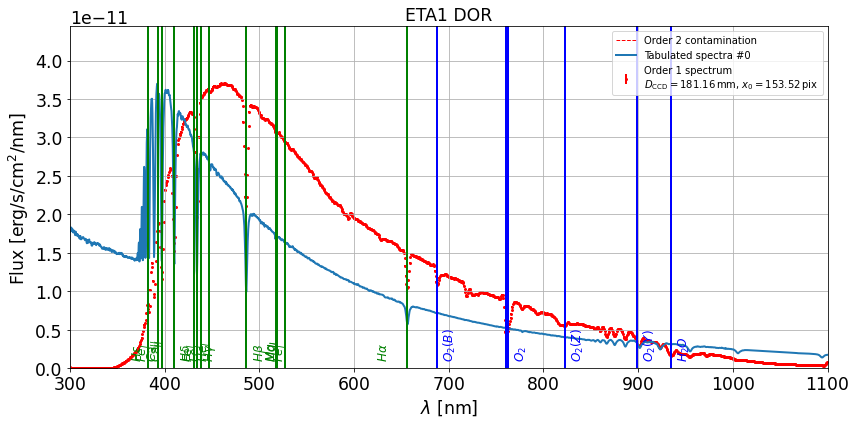

In [56]:
idx=0

fullfilename = all_good_spectra_spectrum_files[idx]
    
filename = os.path.basename(fullfilename)
print(idx,")",filename," ",fullfilename)
    
    
fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 1, 1)
    
filename= os.path.basename(fullfilename)
tag=file_tag_forsorting(filename.split(".")[0])
all_num.append(tag)
    
   
     
s=Spectrum(fullfilename, config=config,fast_load=False)
label=filename.split('.')[0]+" "
#s.plot_spectrum(ax=ax1,force_lines=True,label=label)
s.plot_spectrum(ax=ax1,force_lines=True)
    
    
#ax2 = fig.add_subplot(1, 2, 2)
    
#fullfilename2=all_files_spectrogram[idx]
    
#s.load_spectrogram(fullfilename2)
#s.plot_spectrogram(ax=ax2,scale="log")
    

plt.show()
    

# Perform FFM

In [57]:
from spectractor.simulation.adr import adr_calib, flip_and_rotate_adr_to_image_xy_coordinates

In [58]:
fig_FFMpoutputdir = "fig_FFM_" + configdir
if not os.path.exists(fig_FFMpoutputdir):
        os.makedirs(fig_FFMpoutputdir)

In [59]:
parameters.DISPLAY = True
parameters.DEBUG = True
parameters.VERBOSE = True
parameters.LSST_SAVEFIGPATH = fig_FFMpoutputdir

In [60]:
# Want to plot some information
# if 'LBDAS_T' in spec.header: plot_comparison_truth(spec, w)
# s.header['LBDAS_T'] = True

In [61]:
w = FullForwardModelFitWorkspace(s, verbose=parameters.VERBOSE, plot=True, live_fit=True,
                                         amplitude_priors_method="spectrum")

2022-07-10 18:46:48  FullForwardModelFitWorkspace __init__             INFO   
	Full forward model fitting with regularisation parameter r=1.


In [62]:
dumpfitparameters(w,my_logger)

2022-07-10 18:46:49  root       dumpfitparameters    INFO   

- fit param #0 :: A2 = 1.0 	 fixed = True 	 bounds 0.000 - 20.000
- fit param #1 :: D_CCD [mm] = 181.1585363472343 	 fixed = True 	 bounds 177.409 - 184.909
- fit param #2 :: shift_x [pix] = -0.5871969096971504 	 fixed = True 	 bounds -5.000 - 5.000
- fit param #3 :: shift_y [pix] = 0.0 	 fixed = False 	 bounds -50.000 - 50.000
- fit param #4 :: angle [deg] = 0.203330252738939 	 fixed = False 	 bounds -90.000 - 90.000
- fit param #5 :: B = 1.0 	 fixed = True 	 bounds 0.200 - 5.000
- fit param #6 :: R = 0.0 	 fixed = True 	 bounds -360.000 - 360.000
- fit param #7 :: P [hPa] = 743.55 	 fixed = True 	 bounds 300.000 - 1100.000
- fit param #8 :: T [Celsius] = 10.6 	 fixed = False 	 bounds -100.000 - 100.000
- fit param #9 :: x_c_0 = 1000.0007321003534 	 fixed = True 	 bounds -inf - inf
- fit param #10 :: x_c_1 = 575.5000000000002 	 fixed = True 	 bounds -inf - inf
- fit param #11 :: x_c_2 = 9.488288962896702e-14 	 fixed = True 

2022-07-10 18:46:49  spectractor.extractor.extractor run_ffm_minimisation INFO   
 --- Start FFM with adjust_spectrogram_position_parameters --- 
2022-07-10 18:47:02  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=5.7236e+07 initial chisq_red=1363
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [-3.58256332  0.1651779 ]
	New parameters: [-3.58256332  0.36850815]
	Final cost=2.4953e+07 final chisq_red=594.21 computed in 11.08s
2022-07-10 18:47:04  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:47:05  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


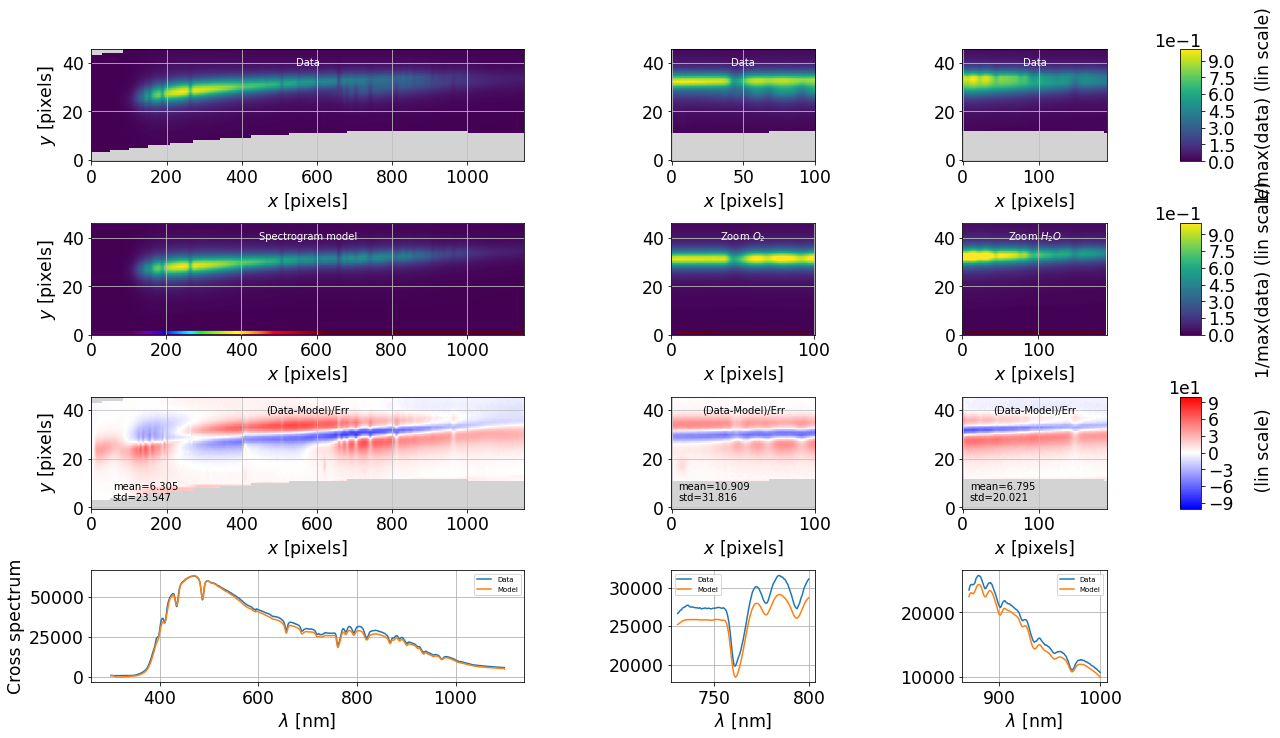

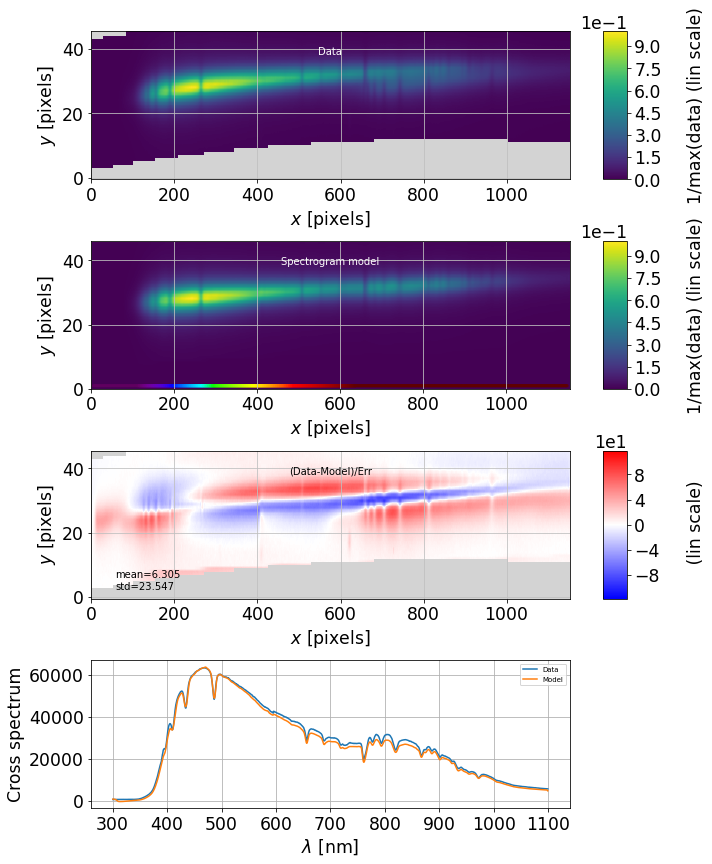

2022-07-10 18:47:18  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=2.4953e+07 initial chisq_red=594.21
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [ 0.28694457 -0.0035436 ]
	New parameters: [-3.29561875  0.36496455]
	Final cost=2.2086e+07 final chisq_red=525.93 computed in 10.07s
2022-07-10 18:47:20  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:47:22  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


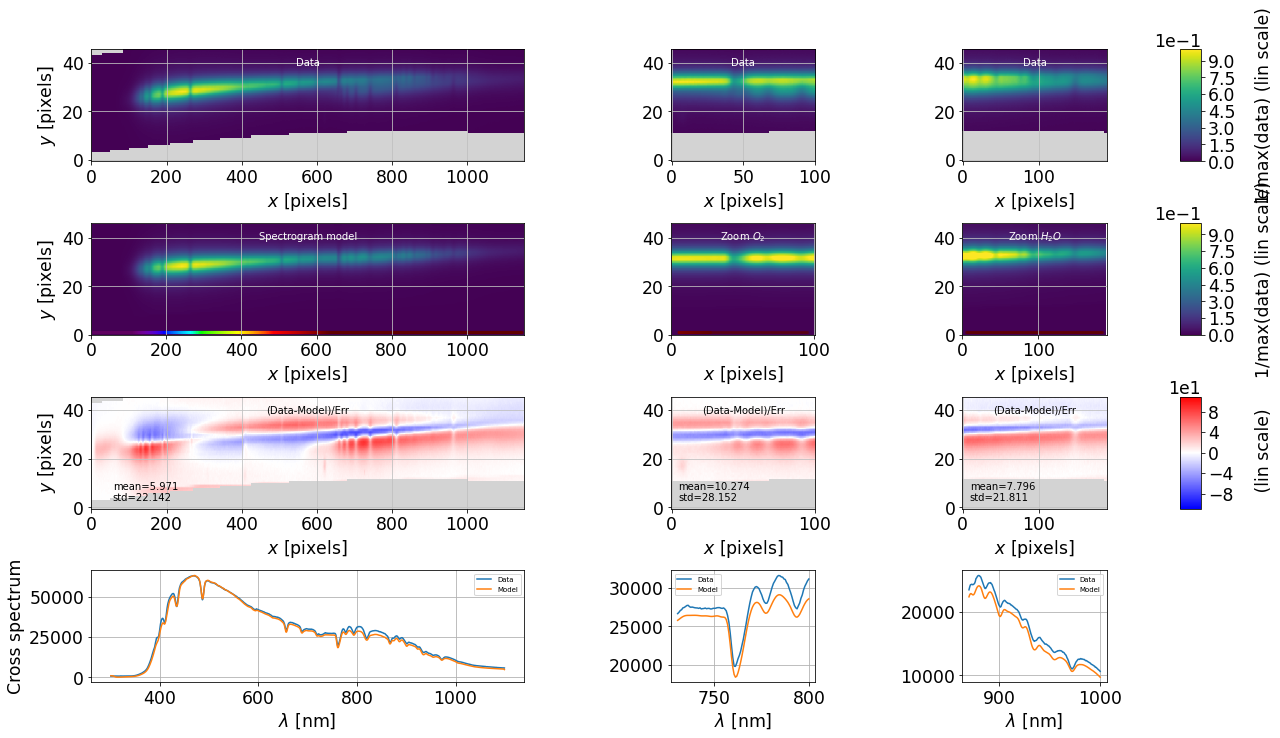

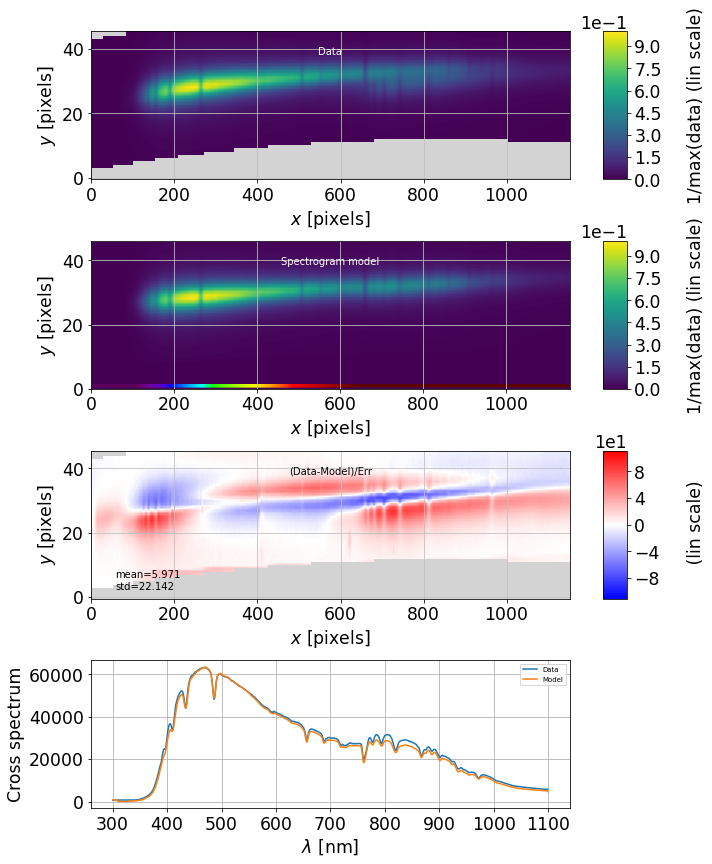

2022-07-10 18:47:40  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=2: initial cost=2.2086e+07 initial chisq_red=525.93
		 Line search: alpha_min=1.62 iter=1 funcalls=5
	Parameter shifts: [-0.02077601  0.00493528]
	New parameters: [-3.31639476  0.36989984]
	Final cost=2.1985e+07 final chisq_red=523.53 computed in 15.40s
2022-07-10 18:47:43  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:47:45  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


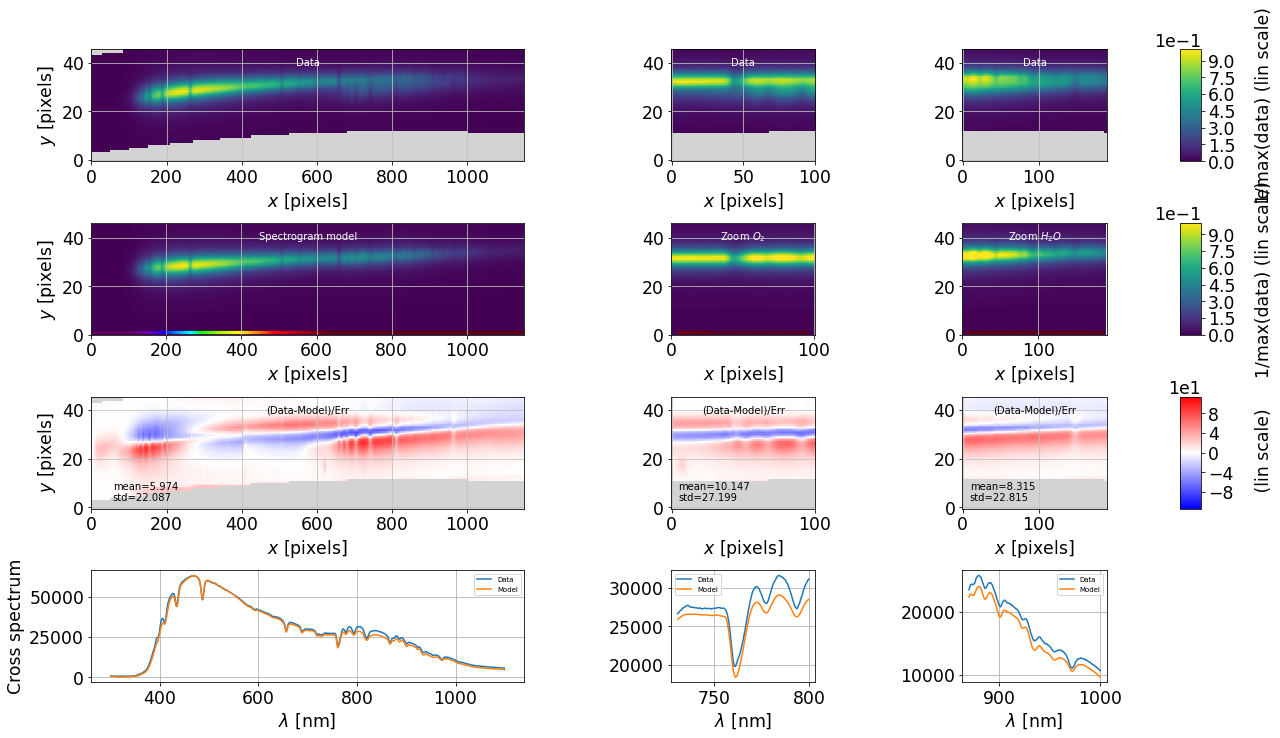

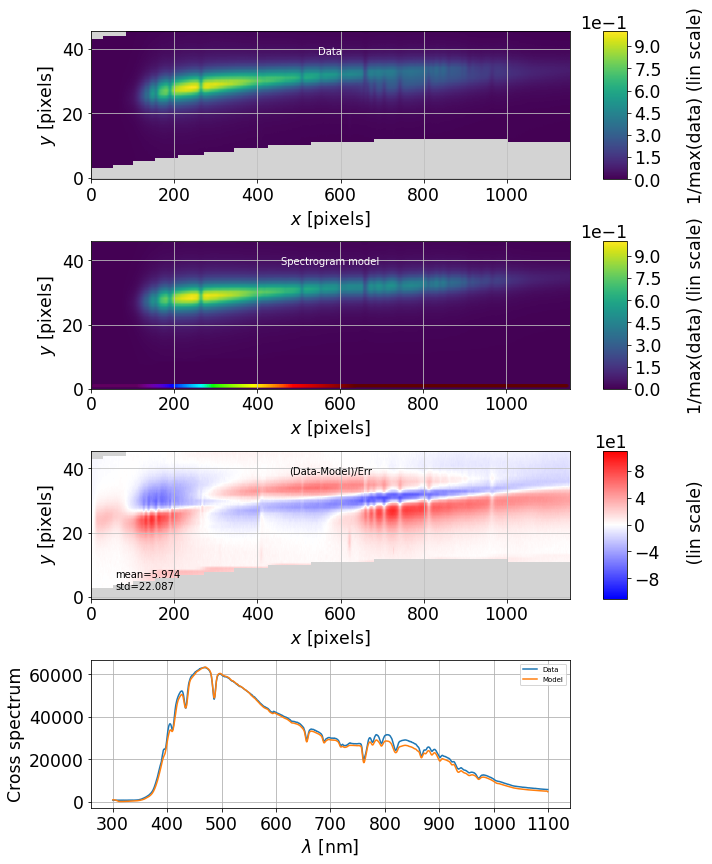

2022-07-10 18:48:04  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=3: initial cost=2.1985e+07 initial chisq_red=523.53
		 Line search: alpha_min=2.98 iter=0 funcalls=6
	Parameter shifts: [-0.03643182  0.00125904]
	New parameters: [-3.35282657  0.37115887]
	Final cost=2.1972e+07 final chisq_red=523.22 computed in 15.93s
2022-07-10 18:48:06  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:48:08  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


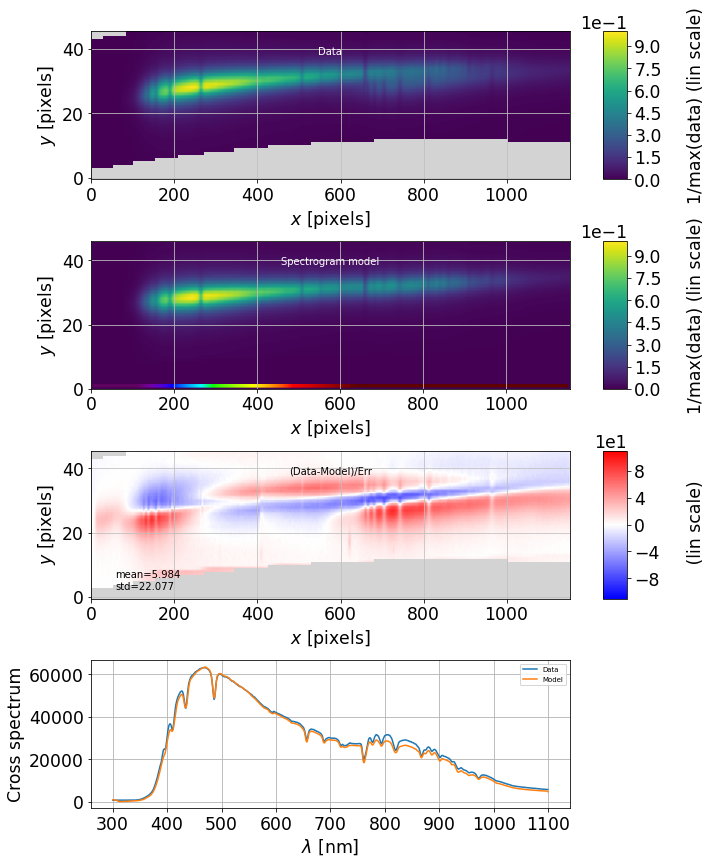

2022-07-10 18:48:12  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=0.0018870772946859903.
2022-07-10 18:48:12  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -3.3528 +0.0002 -0.0002
	angle [deg]: 0.37116 +2e-05 -2e-05
	


	 >>>>> cov =  [[ 3.52338101e-08 -2.60614312e-09]
 [-2.60614312e-09  2.65583890e-10]] >>>>  cov.shape =  (2, 2)


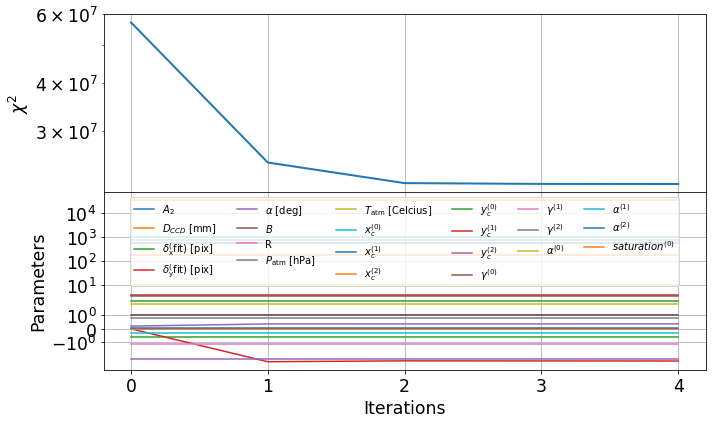

2022-07-10 18:48:16  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:48:18  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


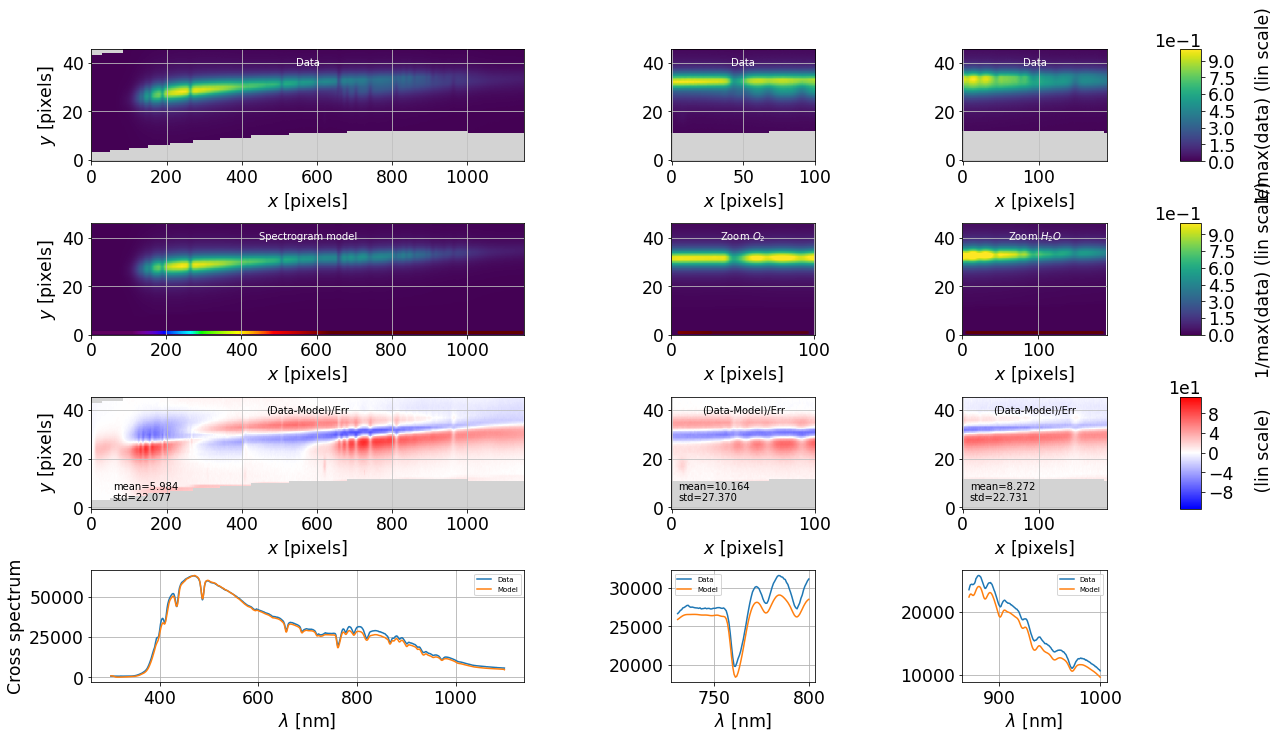

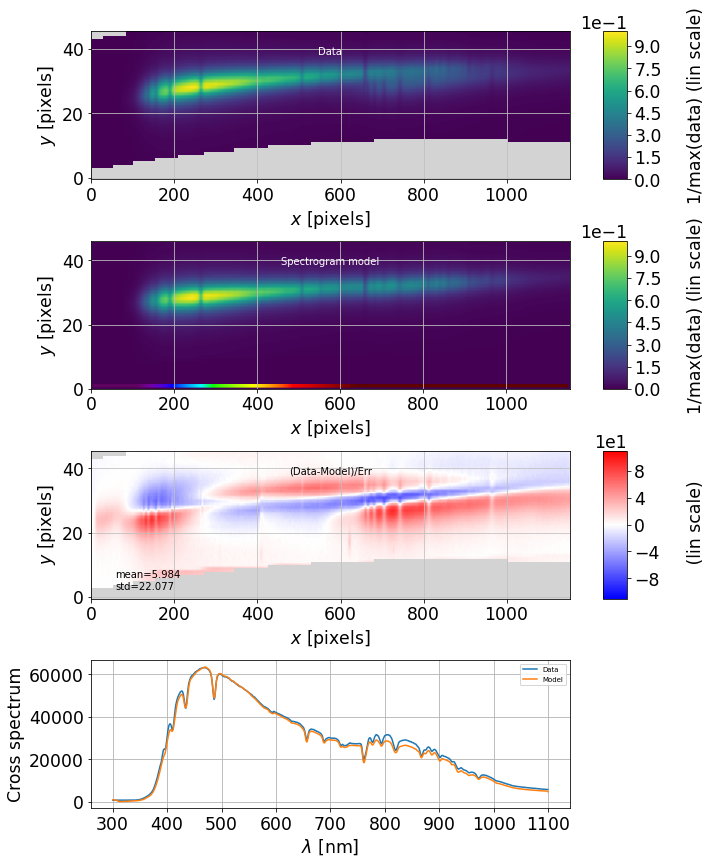

2022-07-10 18:48:20  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_correlation.pdf.
2022-07-10 18:48:21  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/parameters_correlation.pdf.


2022-07-10 18:48:21  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-07-10 18:48:21  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_fitting.txt.


>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 3.52338101e-08 -2.60614312e-09]
 [-2.60614312e-09  2.65583890e-10]]  type =  <class 'numpy.ndarray'>  shape =  (2, 2)
>>>> 	 	  k =  0
>>>>> 	 save_parameters_summary ::  k =  0  ,  ip =  3  p[ip] =  -3.3528265738321923  , label =  shift_y [pix]  , cov =  3.5233810085759434e-08
>>>> 	 	  k =  1
>>>>> 	 save_parameters_summary ::  k =  1  ,  ip =  4  p[ip] =  0.37115887101742817  , label =  angle [deg]  , cov =  2.6558388998597204e-10
>>>> 	 	  k =  2
>>>>> 	 save_parameters_summary ::  SKIP k =  2  >=  kmax =  2
>>>> 	 	  k =  3
>>>>> 	 save_parameters_summary ::  SKIP k =  3  >=  kmax =  2
>>>> 	 	  k =  4
>>>>> 	 save_parameters_summary ::  SKIP k =  4  >=  kmax =  2
>

2022-07-10 18:48:25  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:48:26  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


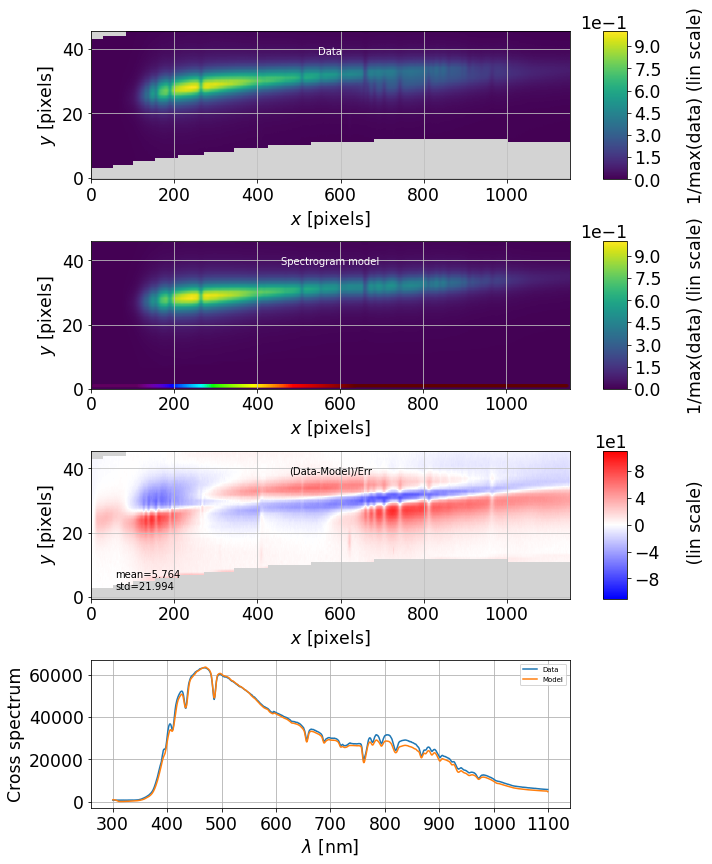

2022-07-10 18:48:29  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Start guess: [ 1.00000000e+00  1.81158536e+02 -5.87196910e-01 -3.35282657e+00
  3.71158871e-01  1.00000000e+00  0.00000000e+00  7.43550000e+02
  1.06000000e+01  1.00000073e+03  5.75500000e+02  9.48828896e-14
  2.16919031e+00  3.77546828e+00 -2.69937191e+00  3.64637994e+00
 -1.11343491e+00  8.21607480e-01  1.84485452e+00 -3.22611818e-01
  4.45918152e-02  3.39997291e+04]
	with ['A2', 'D_CCD [mm]', 'shift_x [pix]', 'shift_y [pix]', 'angle [deg]', 'B', 'R', 'P [hPa]', 'T [Celsius]', 'x_c_0', 'x_c_1', 'x_c_2', 'y_c_0', 'y_c_1', 'y_c_2', 'gamma_0', 'gamma_1', 'gamma_2', 'alpha_0', 'alpha_1', 'alpha_2', 'saturation_0']
2022-07-10 18:48:29  spectractor.extractor.extractor run_ffm_minimisation INFO   
 --- before  run_minimisation ---
2022-07-10 18:48:29  spectractor.extractor.extractor dumpfitparameters    INFO   

- fit param #0 :: A2 = 1.0 	 fixed = True 	 bounds 0.000 - 20.000
- fit param #1 :: D_CCD [mm] = 1

	 >>>>> cov =  [[ 9.07109488e-08 -2.16765325e-09 -9.27137647e-06 -3.14489808e-08
  -5.64270805e-08 -1.64167190e-09 -6.32900631e-09 -1.09418455e-08
  -4.11125468e-09]
 [-2.16765325e-09  1.24907858e-10  7.63135576e-08  8.21358743e-11
   4.09652289e-10  1.29800755e-10  1.59494687e-11  1.36671595e-10
   9.18681345e-11]
 [-9.27137647e-06  7.63135576e-08  2.25349509e-03  7.34684333e-06
   1.71115374e-05 -4.37168153e-06  1.57649488e-06  3.90504070e-06
  -8.64499998e-07]
 [-3.14489808e-08  8.21358743e-11  7.34684333e-06  1.70691066e-06
   2.04024478e-06  3.12763103e-06  5.55546698e-07  6.57999564e-07
   1.03942641e-06]
 [-5.64270805e-08  4.09652289e-10  1.71115374e-05  2.04024478e-06
   5.14714889e-06  3.32531597e-06  6.57941206e-07  1.65360087e-06
   1.10468358e-06]
 [-1.64167190e-09  1.29800755e-10 -4.37168153e-06  3.12763103e-06
   3.32531597e-06  9.87120221e-06  1.03447321e-06  1.09509317e-06
   3.23702267e-06]
 [-6.32900631e-09  1.59494687e-11  1.57649488e-06  5.55546698e-07
   6.57941206

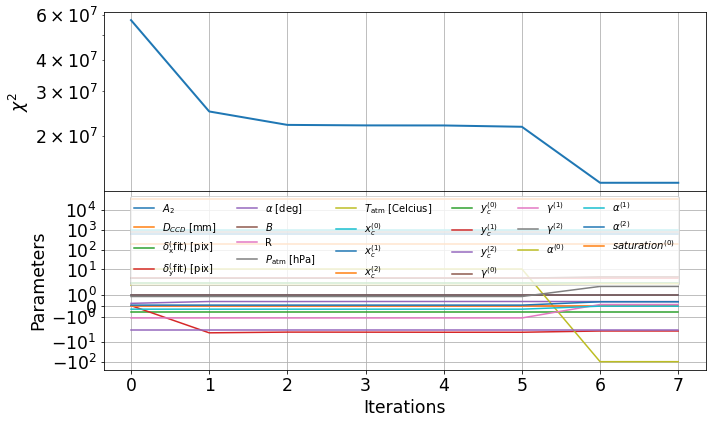

2022-07-10 18:50:34  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:50:35  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


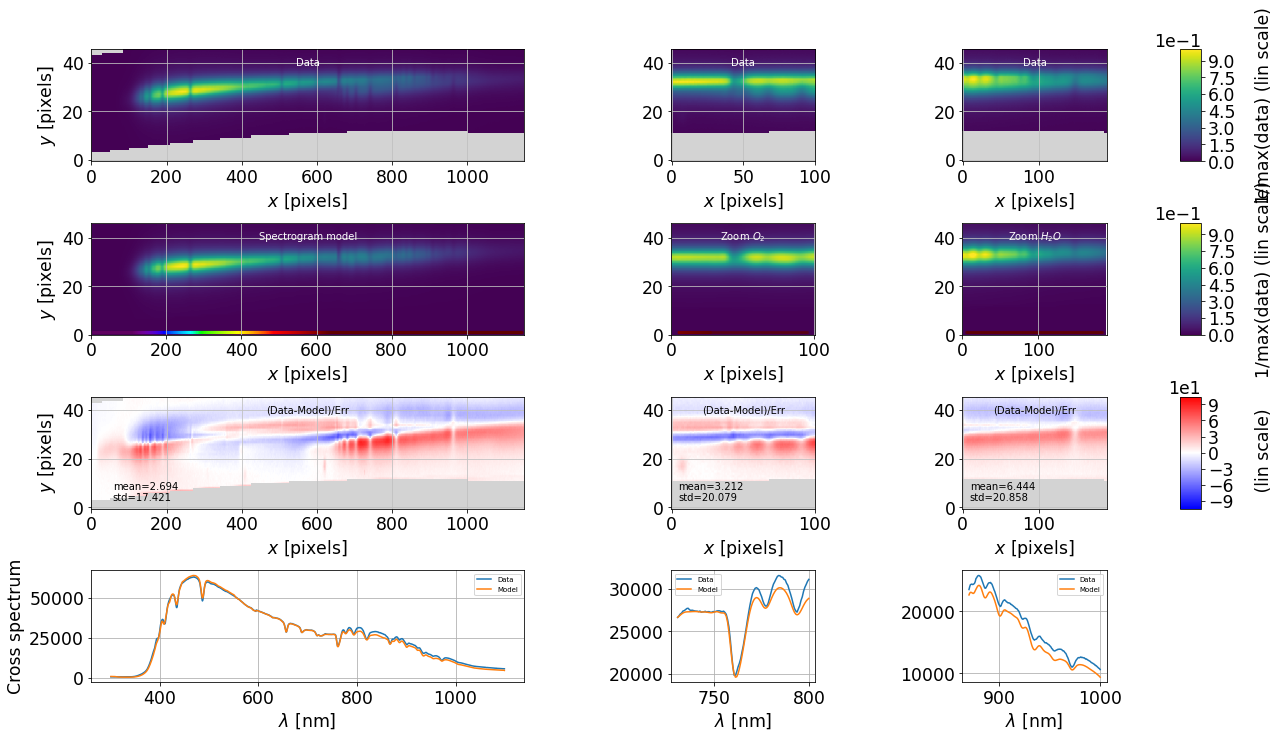

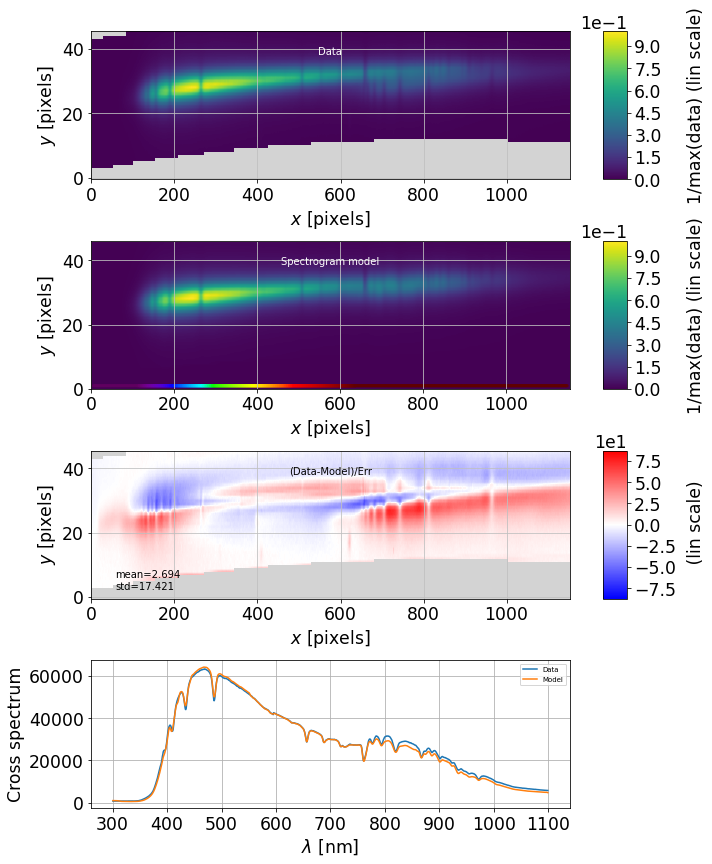

2022-07-10 18:50:38  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_correlation.pdf.
2022-07-10 18:50:38  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/parameters_correlation.pdf.


2022-07-10 18:50:39  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-07-10 18:50:39  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_fitting.txt.
2022-07-10 18:50:39  spectractor.extractor.extractor run_ffm_minimisation INFO   
 --- after  run_minimisation ---
2022-07-10 18:50:39  spectractor.extractor.extractor dumpfitparameters    INFO   

- fit param #0 :: A2 = 1.0 	 fixed = True 	 bounds 0.000 - 20.000
- fit param #1 :: D_CCD [mm] = 181.1585363472343 	 fixed = True 	 bounds 177.409 - 184.909
- fit par

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 9.07109488e-08 -2.16765325e-09 -9.27137647e-06 -3.14489808e-08
  -5.64270805e-08 -1.64167190e-09 -6.32900631e-09 -1.09418455e-08
  -4.11125468e-09]
 [-2.16765325e-09  1.24907858e-10  7.63135576e-08  8.21358743e-11
   4.09652289e-10  1.29800755e-10  1.59494687e-11  1.36671595e-10
   9.18681345e-11]
 [-9.27137647e-06  7.63135576e-08  2.25349509e-03  7.34684333e-06
   1.71115374e-05 -4.37168153e-06  1.57649488e-06  3.90504070e-06
  -8.64499998e-07]
 [-3.14489808e-08  8.21358743e-11  7.34684333e-06  1.70691066e-06
   2.04024478e-06  3.12763103e-06  5.55546698e-07  6.57999564e-07
   1.03942641e-06]
 [-5.64270805e-08  4.09652289e-10  1.71115374e-05  2.04024478e-06
   5.1471488

2022-07-10 18:50:39  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:50:41  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


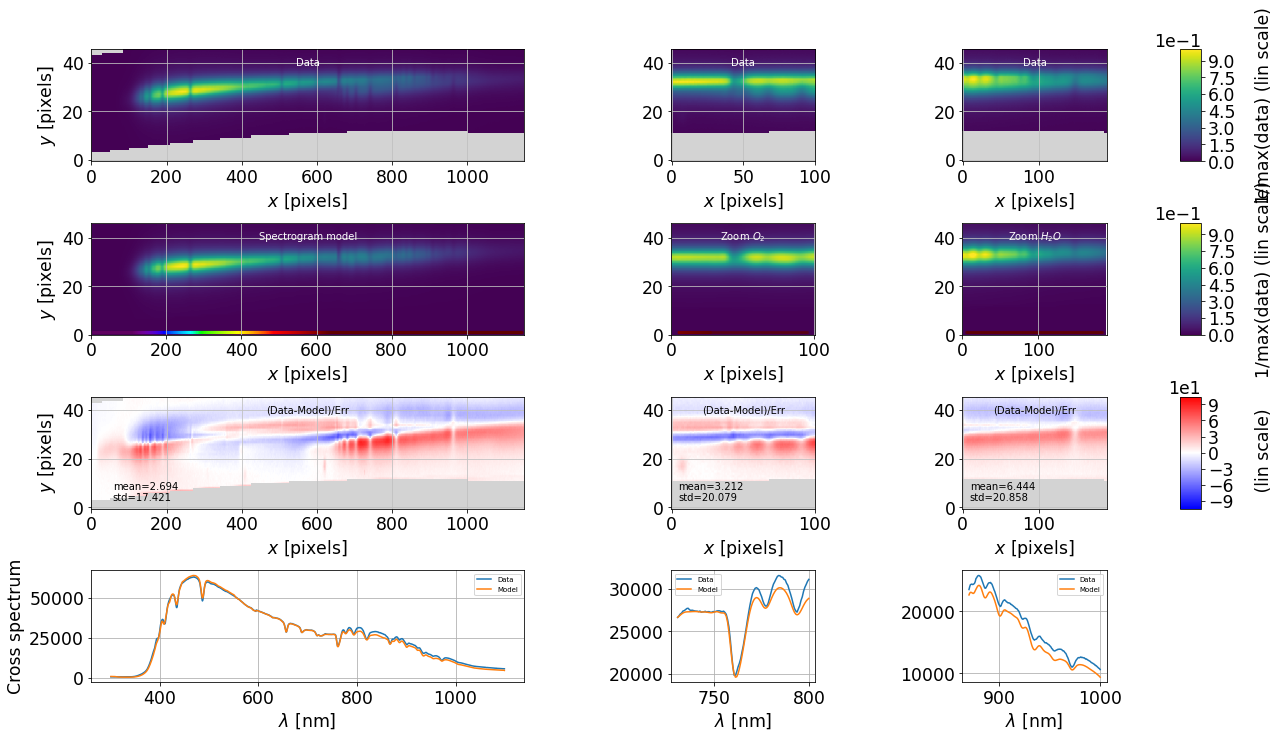

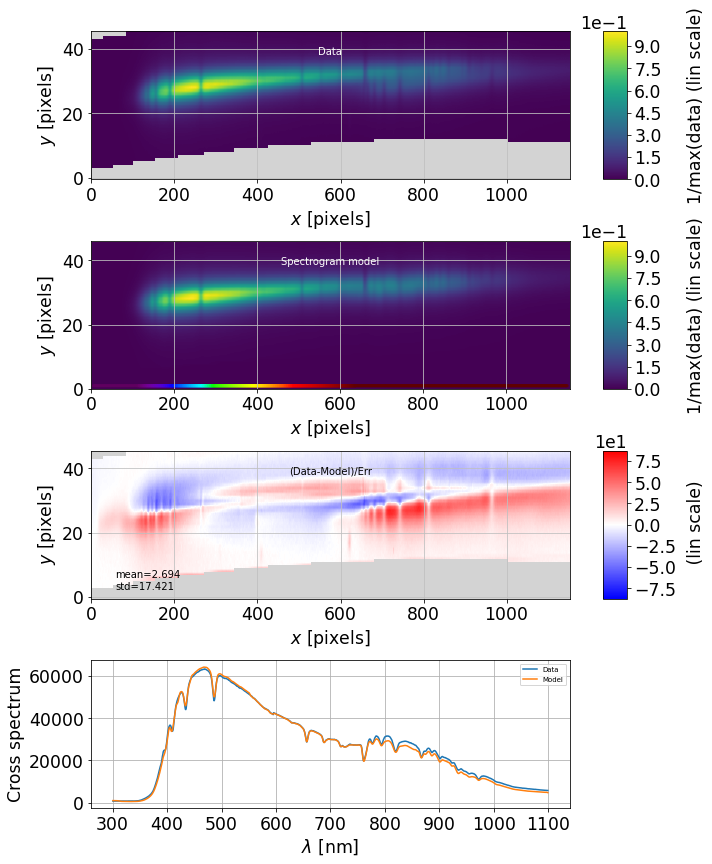

2022-07-10 18:50:43  spectractor.extractor.extractor run_ffm_minimisation INFO   
 --- Start regularization parameter only  ---


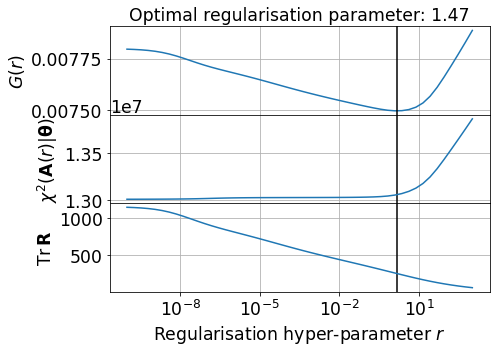

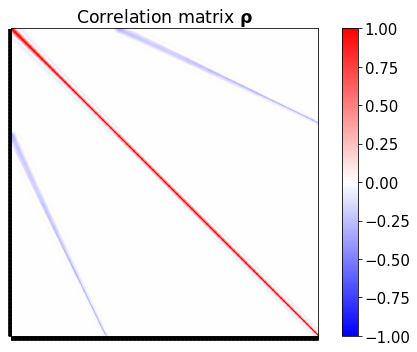

2022-07-10 18:51:25  RegFitWorkspace print_regularisation_summary INFO   
	Optimal regularisation parameter: 1.4695606010167734
	Tr(R) = 258.17958253209963
	N_params = 1152
	N_data = 41994 (without mask and outliers)
2022-07-10 18:51:27  FullForwardModelFitWorkspace run_ffm_minimisation WARNING 
	Trace of final covariance matrix (6296930.709213463) is below the trace of the prior covariance matrix (8003177.578158867). This is probably due to a very high regularisation parameter in case of a bad fit. Therefore the final covariance matrix is multiplied by the ratio of the traces and the amplitude parameters are very close the amplitude priors.
2022-07-10 18:51:27  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:51:29  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


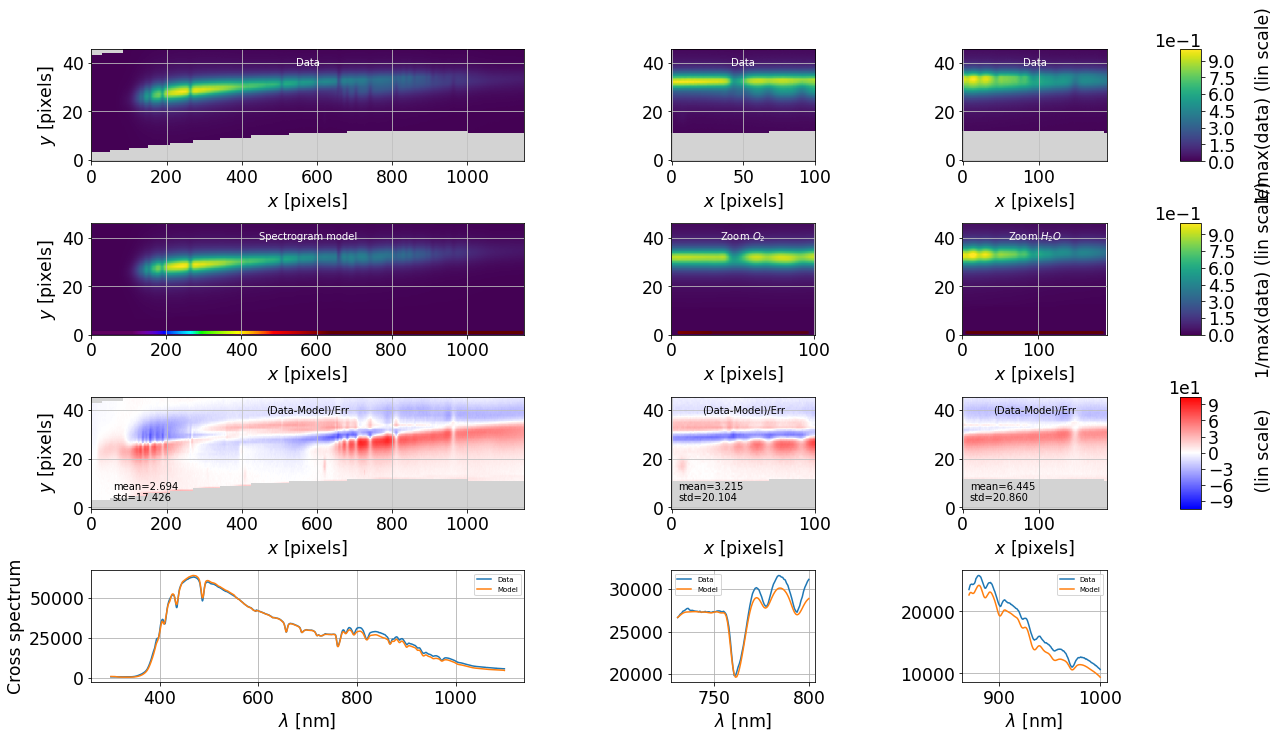

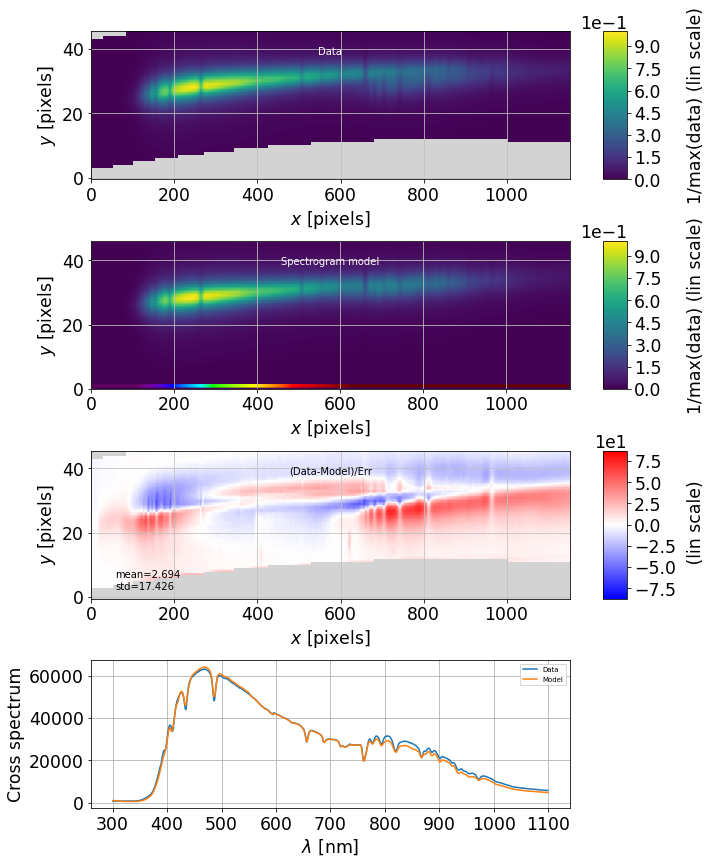

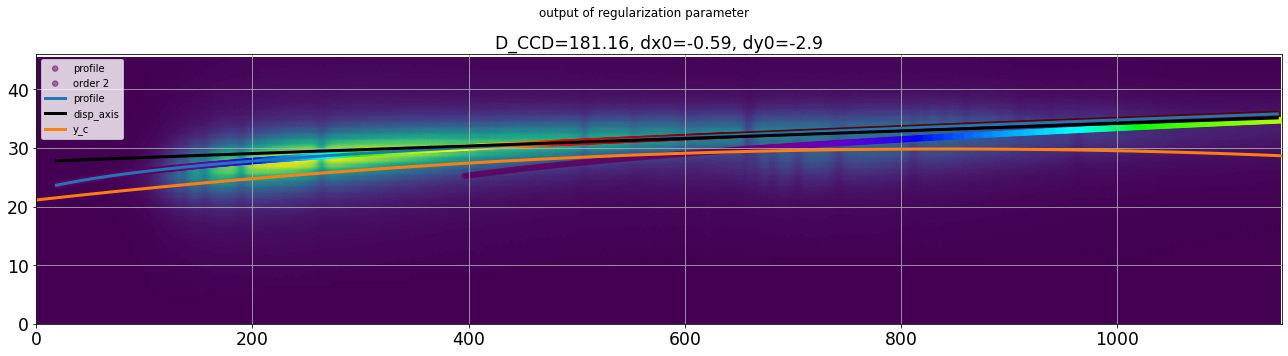

2022-07-10 18:51:32  spectractor.extractor.extractor run_ffm_minimisation INFO   
 --- Start run_minimisation_sigma_clipping  ---
2022-07-10 18:51:34  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	Sigma-clipping step 0/3 (sigma=100)
2022-07-10 18:53:05  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=1.3022e+07 initial chisq_red=309.98
		 Line search: alpha_min=2.53e-10 iter=47 funcalls=51
	Parameter shifts: [ 4.00459177e-11 -1.24479933e-12 -1.61115364e-08  1.49943405e-11
  6.64714910e-11  1.03017397e-10  7.68417606e-12  2.34286645e-11
  1.88692302e-11]
	New parameters: [-2.90303780e+00  3.64063450e-01 -1.00000000e+02  4.30250917e+00
  9.68528119e-02  1.72997968e+00  1.97383299e+00 -4.95342687e-02
  3.43557783e-01]
	Final cost=1.3022e+07 final chisq_red=309.98 computed in 88.60s
2022-07-10 18:53:05  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 0 iterations because the sum of parameter shift relative

	 >>>>> cov =  [[ 9.09998805e-08 -2.16589066e-09 -9.34483073e-06 -3.16251310e-08
  -5.71646710e-08 -1.84921525e-09 -6.32620962e-09 -1.11026312e-08
  -4.17404674e-09]
 [-2.16589066e-09  1.24743027e-10  7.64203924e-08  5.11457789e-11
   3.51172546e-10  1.05383018e-10  4.17817679e-12  1.14469655e-10
   8.24040606e-11]
 [-9.34483073e-06  7.64203924e-08  2.27108831e-03  7.32799353e-06
   1.71490744e-05 -4.38239509e-06  1.55136800e-06  3.88666234e-06
  -8.67412095e-07]
 [-3.16251310e-08  5.11457789e-11  7.32799353e-06  1.67378339e-06
   1.98813774e-06  3.07258180e-06  5.41298243e-07  6.35649574e-07
   1.01608482e-06]
 [-5.71646710e-08  3.51172546e-10  1.71490744e-05  1.98813774e-06
   5.04920875e-06  3.24668810e-06  6.35463961e-07  1.61114805e-06
   1.07159756e-06]
 [-1.84921525e-09  1.05383018e-10 -4.38239509e-06  3.07258180e-06
   3.24668810e-06  9.74095680e-06  1.01080614e-06  1.06146105e-06
   3.17997588e-06]
 [-6.32620962e-09  4.17817679e-12  1.55136800e-06  5.41298243e-07
   6.35463961

2022-07-10 18:53:08  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:53:09  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


2022-07-10 18:53:12  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_correlation.pdf.
2022-07-10 18:53:12  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/parameters_correlation.pdf.


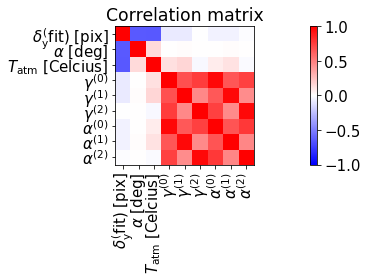

2022-07-10 18:53:13  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-07-10 18:53:13  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_fitting.txt.
2022-07-10 18:53:13  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-07-10 18:53:13  spectractor.extractor.extractor run_ffm_minimisation INFO   
	  niter = 0 : Newton: total computation time: 283.7354428768158s
2022-07-10 18:53:13  spectractor.extractor.extractor 

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 9.09998805e-08 -2.16589066e-09 -9.34483073e-06 -3.16251310e-08
  -5.71646710e-08 -1.84921525e-09 -6.32620962e-09 -1.11026312e-08
  -4.17404674e-09]
 [-2.16589066e-09  1.24743027e-10  7.64203924e-08  5.11457789e-11
   3.51172546e-10  1.05383018e-10  4.17817679e-12  1.14469655e-10
   8.24040606e-11]
 [-9.34483073e-06  7.64203924e-08  2.27108831e-03  7.32799353e-06
   1.71490744e-05 -4.38239509e-06  1.55136800e-06  3.88666234e-06
  -8.67412095e-07]
 [-3.16251310e-08  5.11457789e-11  7.32799353e-06  1.67378339e-06
   1.98813774e-06  3.07258180e-06  5.41298243e-07  6.35649574e-07
   1.01608482e-06]
 [-5.71646710e-08  3.51172546e-10  1.71490744e-05  1.98813774e-06
   5.0492087

2022-07-10 18:53:13  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:53:15  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


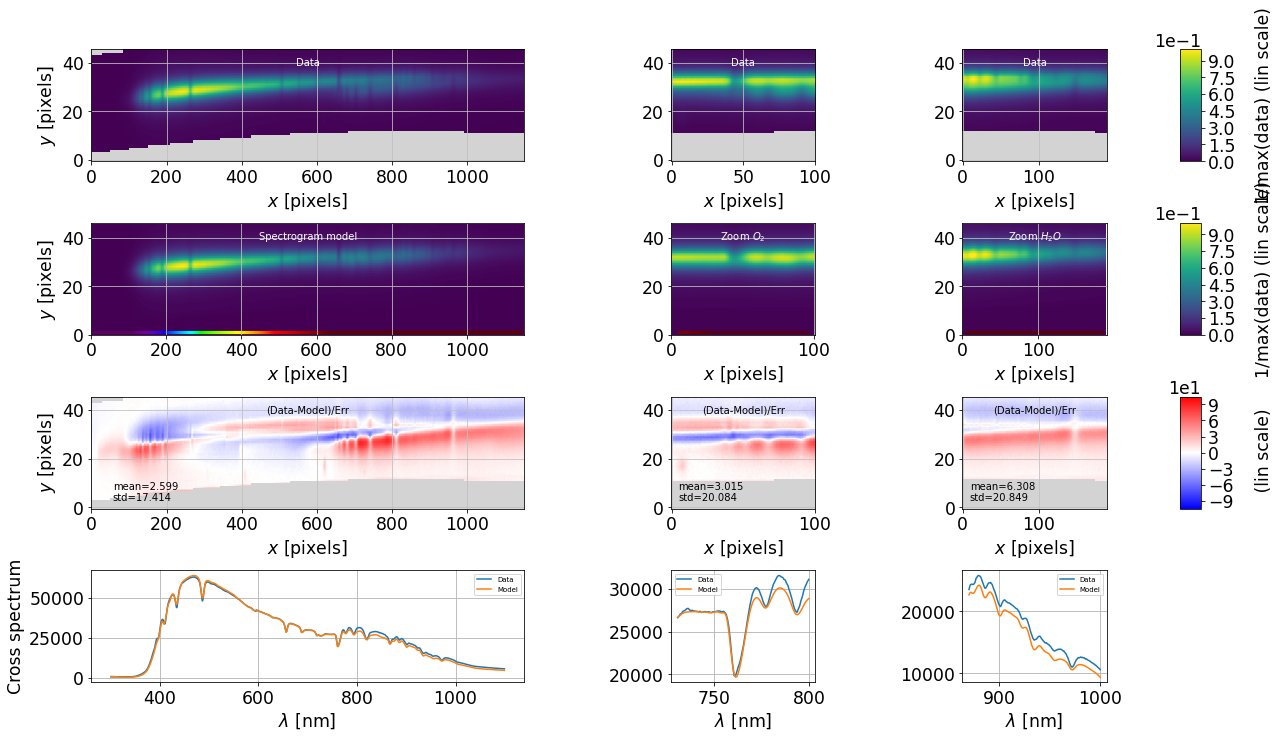

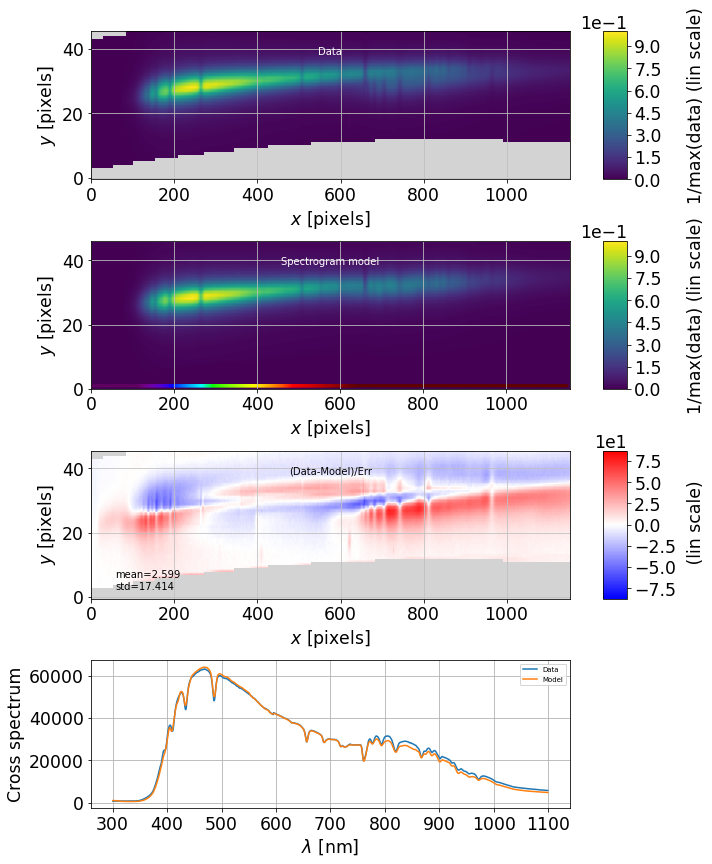

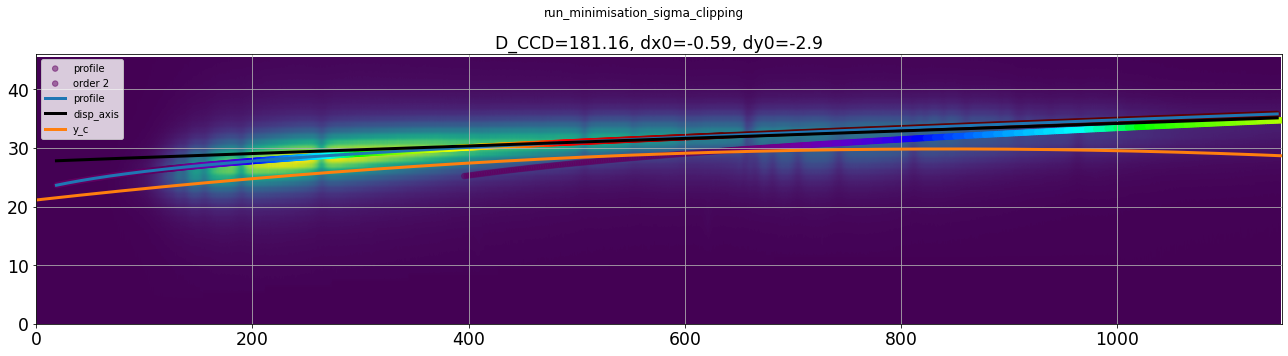

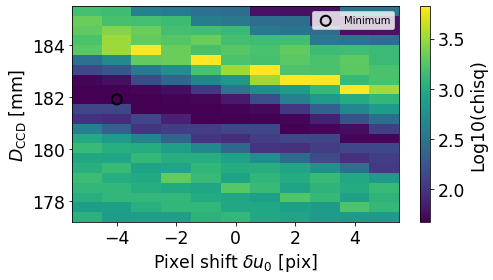

2022-07-10 18:53:38  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	Sigma-clipping step 0/3 (sigma=100)
2022-07-10 18:55:15  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=1.3241e+07 initial chisq_red=315.21
		 Line search: alpha_min=3.16e-11 iter=50 funcalls=54
	Parameter shifts: [ 5.44450171e-12 -1.97929622e-13 -2.05483860e-09  1.79820326e-12
  7.75245700e-12  1.32417611e-11  9.16889821e-13  2.72775823e-12
  2.41774749e-12]
	New parameters: [-2.90303780e+00  3.64063450e-01 -1.00000000e+02  4.30250917e+00
  9.68528119e-02  1.72997968e+00  1.97383299e+00 -4.95342687e-02
  3.43557783e-01]
	Final cost=1.3241e+07 final chisq_red=315.21 computed in 94.16s
2022-07-10 18:55:15  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 0 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-05.
2022-07-10 18:55:15  spectractor.fit.fitter print_parameter_summary INFO   
	sh

	 >>>>> cov =  [[ 1.02591487e-07 -2.82421227e-09 -9.81262889e-06 -3.36612761e-08
  -6.19835541e-08 -2.29285838e-09 -6.99866368e-09 -1.27795363e-08
  -4.47886461e-09]
 [-2.82421227e-09  1.62176417e-10  1.01240493e-07  1.51785855e-10
   6.02679929e-10  7.96615047e-11  3.65514798e-11  2.01515507e-10
   8.48381481e-11]
 [-9.81262889e-06  1.01240493e-07  2.30258094e-03  7.39622852e-06
   1.73995906e-05 -4.31077608e-06  1.57888881e-06  3.97572055e-06
  -8.32595142e-07]
 [-3.36612761e-08  1.51785855e-10  7.39622852e-06  1.66701841e-06
   1.97861182e-06  3.05817729e-06  5.39286716e-07  6.32908905e-07
   1.01158357e-06]
 [-6.19835541e-08  6.02679929e-10  1.73995906e-05  1.97861182e-06
   5.03664780e-06  3.22595680e-06  6.32708592e-07  1.60784779e-06
   1.06525015e-06]
 [-2.29285838e-09  7.96615047e-11 -4.31077608e-06  3.05817729e-06
   3.22595680e-06  9.71133720e-06  1.00633881e-06  1.05509508e-06
   3.17098622e-06]
 [-6.99866368e-09  3.65514798e-11  1.57888881e-06  5.39286716e-07
   6.32708592

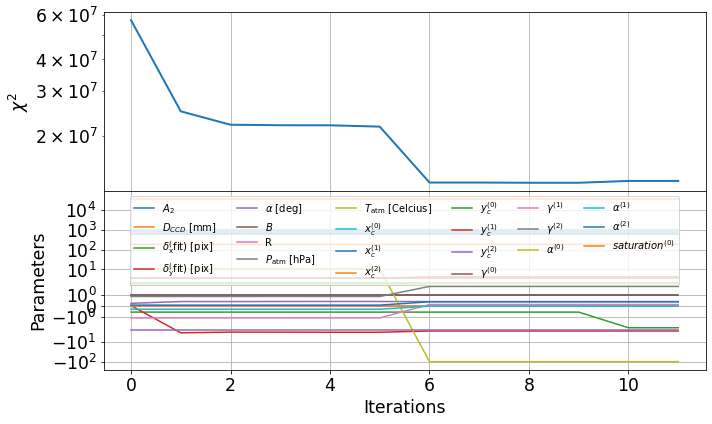

2022-07-10 18:55:18  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:55:20  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


2022-07-10 18:55:23  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_correlation.pdf.
2022-07-10 18:55:23  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/parameters_correlation.pdf.


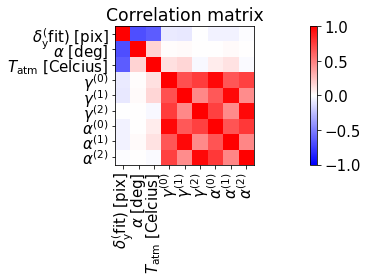

2022-07-10 18:55:24  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-07-10 18:55:24  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_fitting.txt.
2022-07-10 18:55:24  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-07-10 18:55:24  spectractor.extractor.extractor run_ffm_minimisation INFO   
	  niter = 1 : Newton: total computation time: 414.886088848114s
2022-07-10 18:55:24  spectractor.extractor.extractor r

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.02591487e-07 -2.82421227e-09 -9.81262889e-06 -3.36612761e-08
  -6.19835541e-08 -2.29285838e-09 -6.99866368e-09 -1.27795363e-08
  -4.47886461e-09]
 [-2.82421227e-09  1.62176417e-10  1.01240493e-07  1.51785855e-10
   6.02679929e-10  7.96615047e-11  3.65514798e-11  2.01515507e-10
   8.48381481e-11]
 [-9.81262889e-06  1.01240493e-07  2.30258094e-03  7.39622852e-06
   1.73995906e-05 -4.31077608e-06  1.57888881e-06  3.97572055e-06
  -8.32595142e-07]
 [-3.36612761e-08  1.51785855e-10  7.39622852e-06  1.66701841e-06
   1.97861182e-06  3.05817729e-06  5.39286716e-07  6.32908905e-07
   1.01158357e-06]
 [-6.19835541e-08  6.02679929e-10  1.73995906e-05  1.97861182e-06
   5.0366478

2022-07-10 18:55:24  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:55:26  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


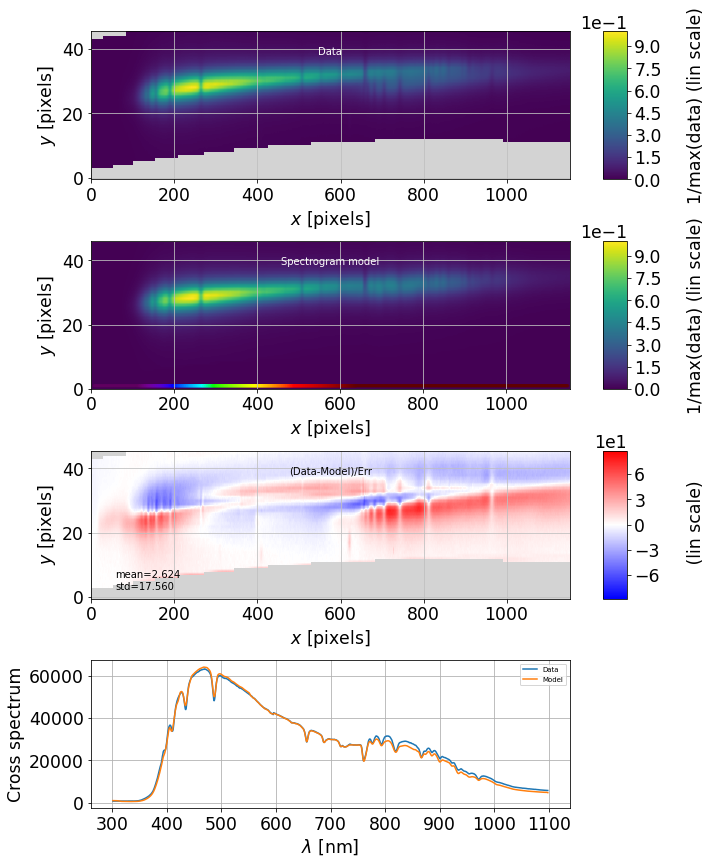

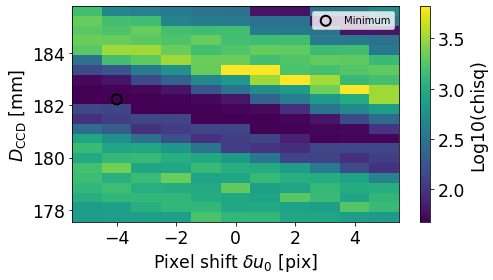

2022-07-10 18:55:49  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	Sigma-clipping step 0/3 (sigma=100)
2022-07-10 18:57:35  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=1.3067e+07 initial chisq_red=311.05
		 Line search: alpha_min=-2.64e-11 iter=50 funcalls=54
	Parameter shifts: [-9.44738729e-12  4.34380124e-13  1.86235086e-09 -1.24198577e-12
 -4.99996065e-12 -1.31794266e-11 -7.20681458e-13 -1.76247630e-12
 -2.77533609e-12]
	New parameters: [-2.90303780e+00  3.64063450e-01 -1.00000000e+02  4.30250917e+00
  9.68528119e-02  1.72997968e+00  1.97383299e+00 -4.95342687e-02
  3.43557783e-01]
	Final cost=1.3067e+07 final chisq_red=311.05 computed in 104.15s
2022-07-10 18:57:35  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 0 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-05.
2022-07-10 18:57:35  spectractor.fit.fitter print_parameter_summary INFO   
	

	 >>>>> cov =  [[ 1.92789633e-07 -7.96382631e-09 -1.30936052e-05 -4.13104097e-08
  -9.69452827e-08  3.19924051e-08 -8.97387225e-09 -2.48024380e-08
   6.91445809e-09]
 [-7.96382631e-09  4.57240155e-10  2.86539390e-07  5.84603488e-10
   2.59120043e-09 -1.81701484e-09  1.50569780e-10  8.89600783e-10
  -5.51497870e-10]
 [-1.30936052e-05  2.86539390e-07  2.39986479e-03  7.66134149e-06
   1.85676628e-05 -5.66294329e-06  1.64640988e-06  4.38723051e-06
  -1.27545179e-06]
 [-4.13104097e-08  5.84603488e-10  7.66134149e-06  1.66697854e-06
   1.98020025e-06  3.05229467e-06  5.39031901e-07  6.33232250e-07
   1.00950257e-06]
 [-9.69452827e-08  2.59120043e-09  1.85676628e-05  1.98020025e-06
   5.04605319e-06  3.20899899e-06  6.32714145e-07  1.61055068e-06
   1.05958618e-06]
 [ 3.19924051e-08 -1.81701484e-09 -5.66294329e-06  3.05229467e-06
   3.20899899e-06  9.71357497e-06  1.00438120e-06  1.04933047e-06
   3.17057239e-06]
 [-8.97387225e-09  1.50569780e-10  1.64640988e-06  5.39031901e-07
   6.32714145

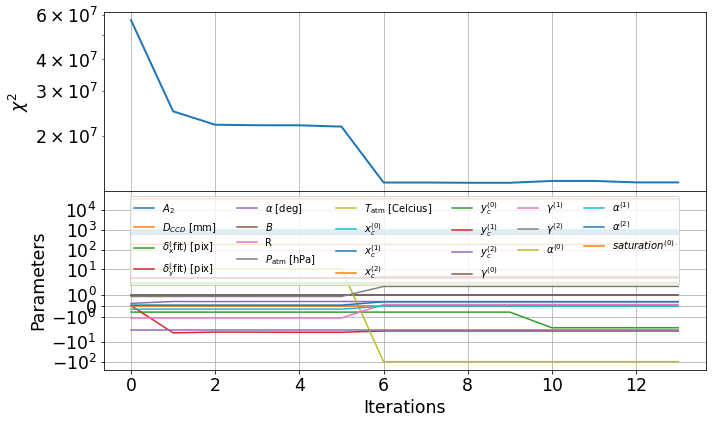

2022-07-10 18:57:40  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:57:42  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


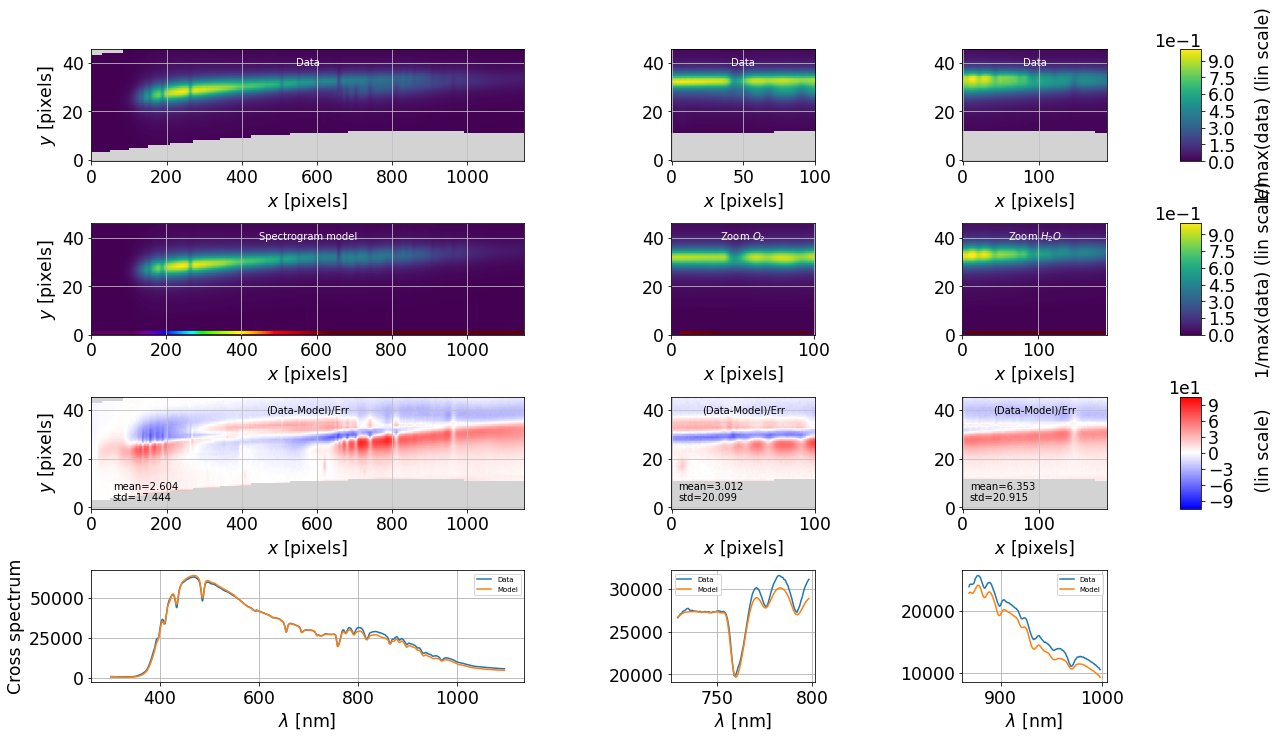

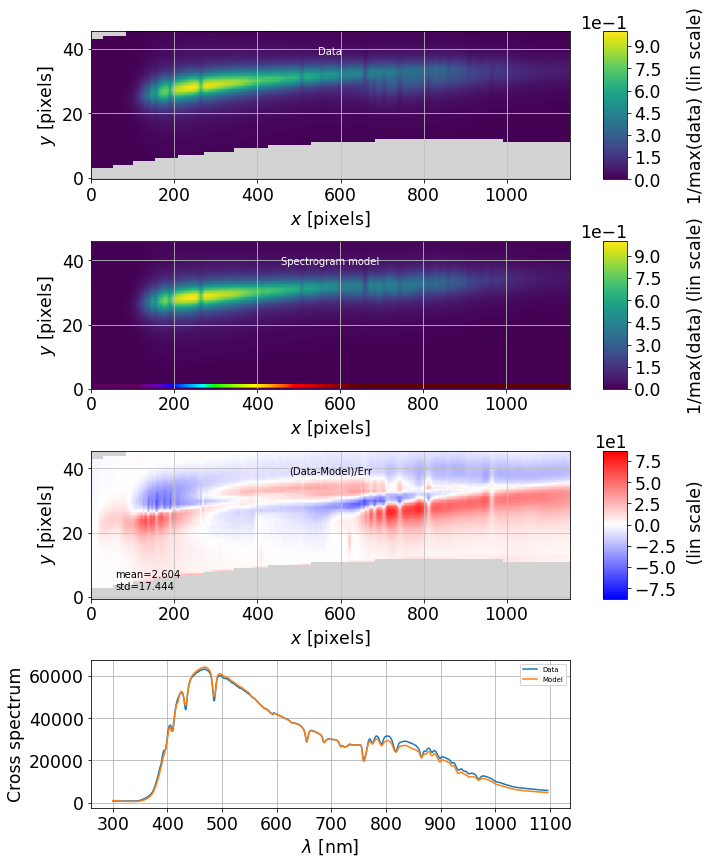

2022-07-10 18:57:45  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_correlation.pdf.
2022-07-10 18:57:45  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/parameters_correlation.pdf.


2022-07-10 18:57:46  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.
2022-07-10 18:57:46  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_fitting.txt.
2022-07-10 18:57:46  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-07-10 18:57:46  spectractor.extractor.extractor run_ffm_minimisation INFO   
	  niter = 2 : Newton: total computation time: 557.0528349876404s
2022-07-10 18:57:46  spectractor.extractor.extractor 

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.92789633e-07 -7.96382631e-09 -1.30936052e-05 -4.13104097e-08
  -9.69452827e-08  3.19924051e-08 -8.97387225e-09 -2.48024380e-08
   6.91445809e-09]
 [-7.96382631e-09  4.57240155e-10  2.86539390e-07  5.84603488e-10
   2.59120043e-09 -1.81701484e-09  1.50569780e-10  8.89600783e-10
  -5.51497870e-10]
 [-1.30936052e-05  2.86539390e-07  2.39986479e-03  7.66134149e-06
   1.85676628e-05 -5.66294329e-06  1.64640988e-06  4.38723051e-06
  -1.27545179e-06]
 [-4.13104097e-08  5.84603488e-10  7.66134149e-06  1.66697854e-06
   1.98020025e-06  3.05229467e-06  5.39031901e-07  6.33232250e-07
   1.00950257e-06]
 [-9.69452827e-08  2.59120043e-09  1.85676628e-05  1.98020025e-06
   5.0460531

2022-07-10 18:57:47  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:57:49  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


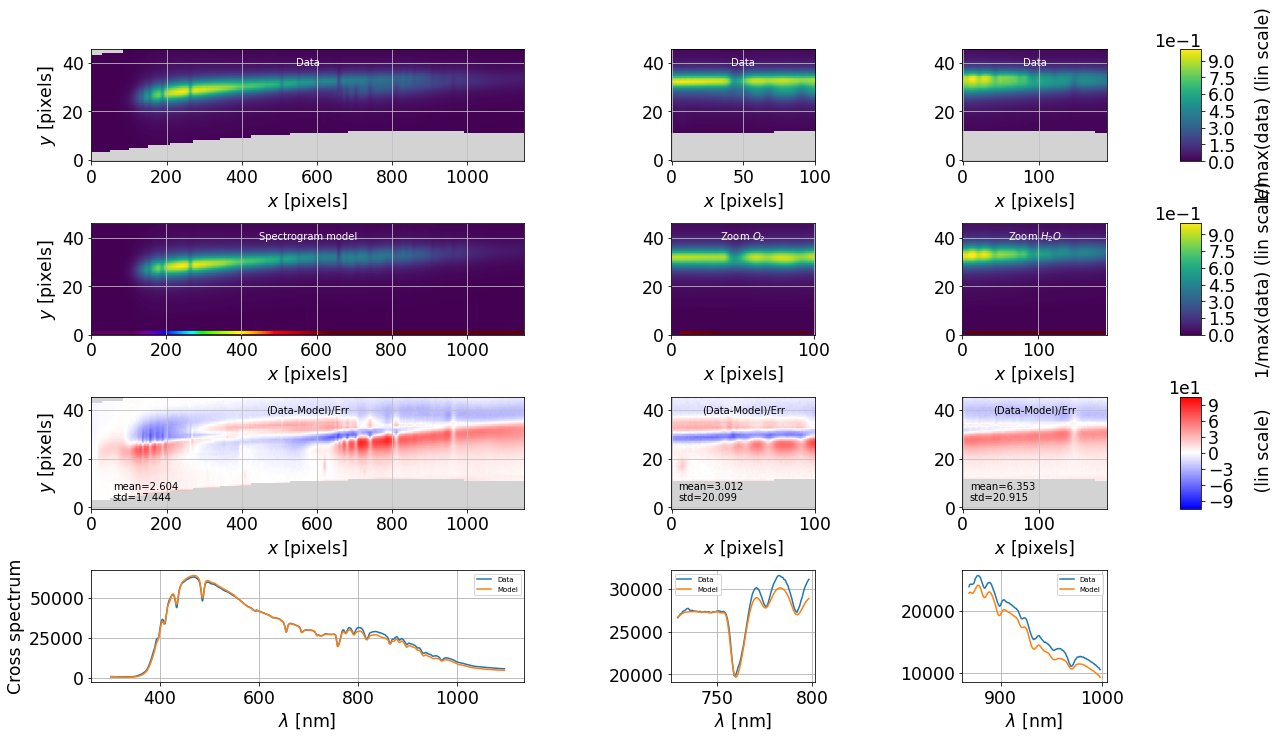

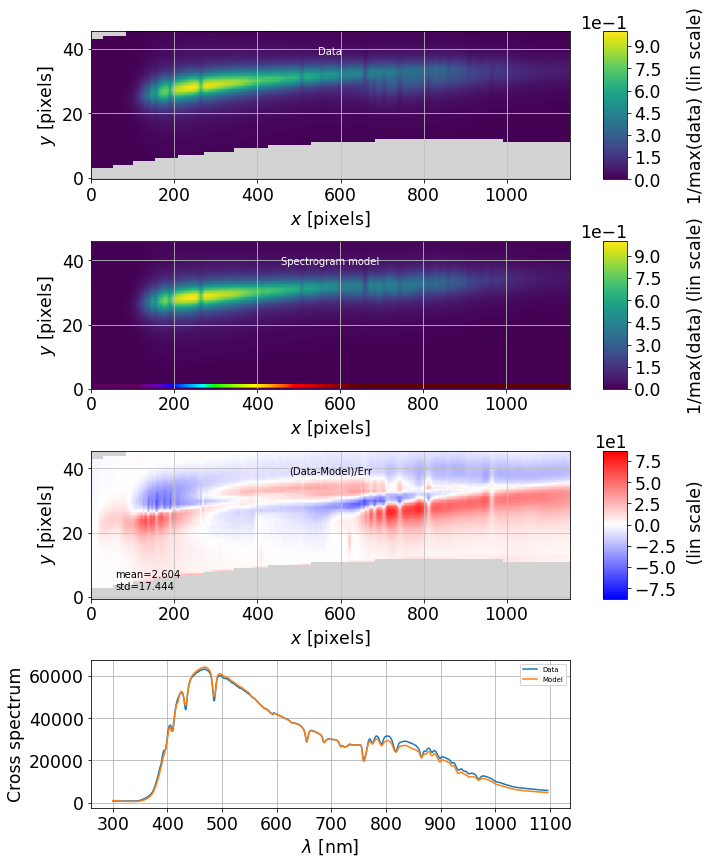

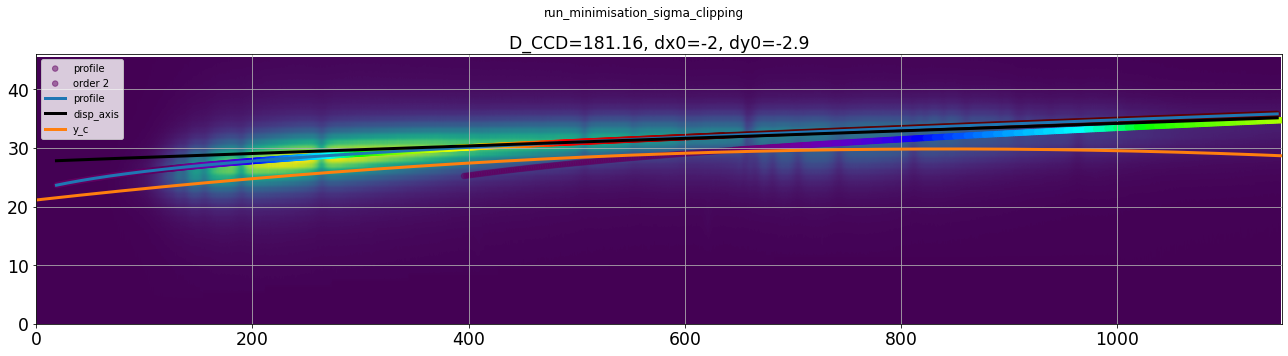

2022-07-10 18:58:13  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_correlation.pdf.
2022-07-10 18:58:14  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/parameters_correlation.pdf.


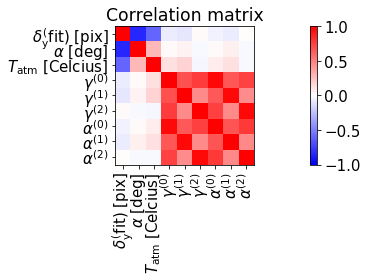

2022-07-10 18:58:14  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt.


>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /Users/dagoret/DATA/AuxTelData2022/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2FFM/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.92789633e-07 -7.96382631e-09 -1.30936052e-05 -4.13104097e-08
  -9.69452827e-08  3.19924051e-08 -8.97387225e-09 -2.48024380e-08
   6.91445809e-09]
 [-7.96382631e-09  4.57240155e-10  2.86539390e-07  5.84603488e-10
   2.59120043e-09 -1.81701484e-09  1.50569780e-10  8.89600783e-10
  -5.51497870e-10]
 [-1.30936052e-05  2.86539390e-07  2.39986479e-03  7.66134149e-06
   1.85676628e-05 -5.66294329e-06  1.64640988e-06  4.38723051e-06
  -1.27545179e-06]
 [-4.13104097e-08  5.84603488e-10  7.66134149e-06  1.66697854e-06
   1.98020025e-06  3.05229467e-06  5.39031901e-07  6.33232250e-07
   1.00950257e-06]
 [-9.69452827e-08  2.59120043e-09  1.85676628e-05  1.98020025e-06
   5.0460531

2022-07-10 18:58:15  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit.pdf.
2022-07-10 18:58:16  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2FFM/ffm_bestfit_2.pdf.


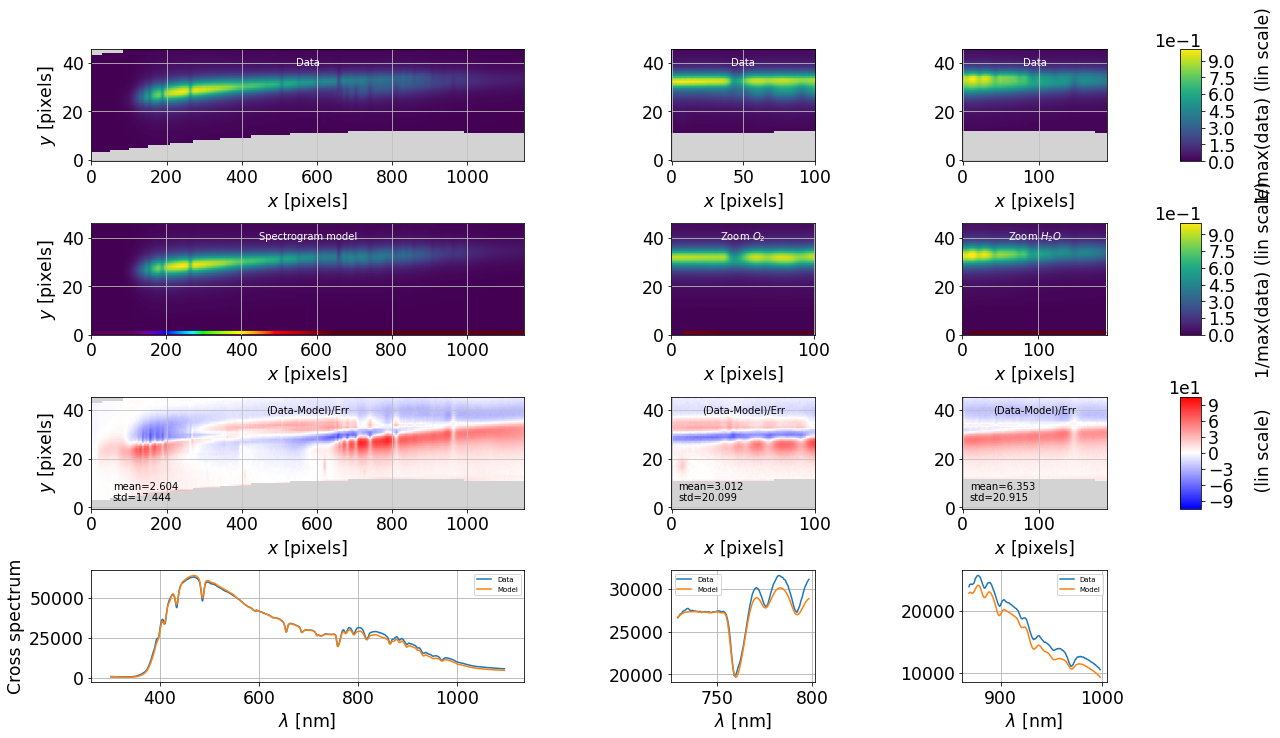

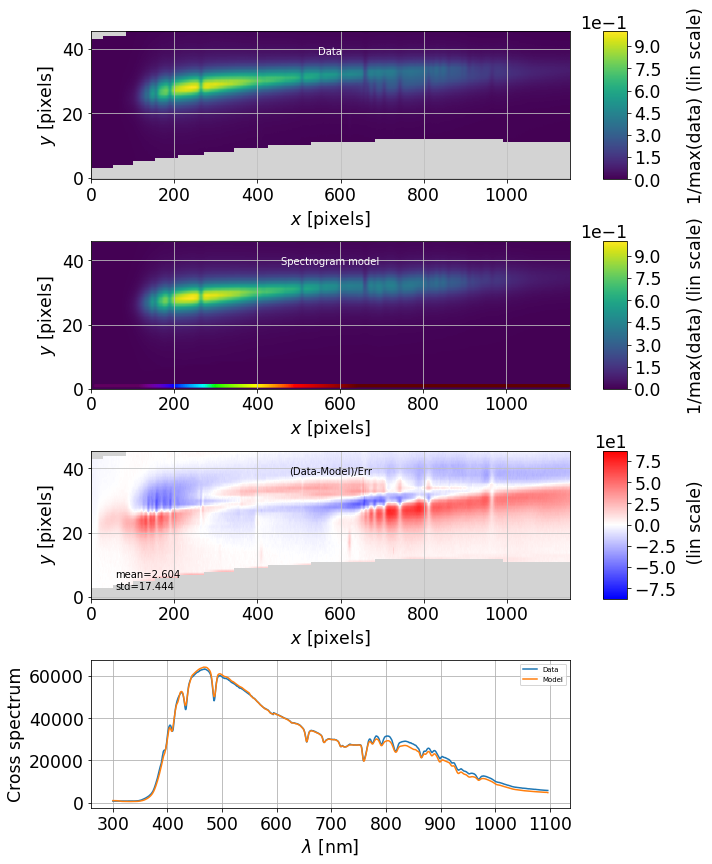

2022-07-10 18:58:21  Spectrum   convert_from_ADUrate_to_flam WARNING You ask to convert spectrum already in erg/s/cm$^2$/nm in erg/s/cm^2/nm... check your code ! Skip the instruction.


In [63]:
# increase the nulber of iteration
spectrum = run_ffm_minimisation(w, method="newton", niter=3)

In [64]:
#showfitparameter(w)
dumpfitparameters(w,my_logger)

2022-07-10 18:58:21  root       dumpfitparameters    INFO   

- fit param #0 :: A2 = 1.0 	 fixed = True 	 bounds 0.000 - 20.000
- fit param #1 :: D_CCD [mm] = 181.7967122322542 	 fixed = True 	 bounds 177.409 - 184.909
- fit param #2 :: shift_x [pix] = -1.9998673384259553 	 fixed = True 	 bounds -5.000 - 5.000
- fit param #3 :: shift_y [pix] = -2.9030377994640997 	 fixed = False 	 bounds -50.000 - 50.000
- fit param #4 :: angle [deg] = 0.3640634502764271 	 fixed = False 	 bounds -90.000 - 90.000
- fit param #5 :: B = 1.0 	 fixed = True 	 bounds 0.200 - 5.000
- fit param #6 :: R = 0.0 	 fixed = True 	 bounds -360.000 - 360.000
- fit param #7 :: P [hPa] = 743.55 	 fixed = True 	 bounds 300.000 - 1100.000
- fit param #8 :: T [Celsius] = -99.99999999813765 	 fixed = False 	 bounds -100.000 - 100.000
- fit param #9 :: x_c_0 = 1000.0007321003534 	 fixed = True 	 bounds -inf - inf
- fit param #10 :: x_c_1 = 575.5000000000002 	 fixed = True 	 bounds -inf - inf
- fit param #11 :: x_c_2 = 9.4882

2022-07-10 18:58:21  astroquery _showwarning         WARNING UnitsWarning: 'reduced' did not parse as fits unit: At col 0, Unit 'reduced' not supported by the FITS standard.  If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html


    Line    Tabulated  Detected    Shift       FWHM     Amplitude       SNR      Chisq   Eqwidth_mod Eqwidth_data
                nm        nm         nm         nm                              reduced       nm          nm     
----------- --------- --------- ----------- --------- -------------- --------- --------- ----------- ------------
   $Fe_{I}$ 382.06653  380.2567  -1.8098329 14.087767 -3.0748583e-12 68.865776  650.2991   4.9820356    22.380098
  $Ca_{II}$ 393.38922 390.66638   -2.722839 2.5442553 -4.5486254e-12 101.87286  650.2991   0.6677455    1.5443792
  $Ca_{II}$ 396.87042 395.12988  -1.7405323 2.9003172 -3.4158475e-12   76.5027  650.2991  0.49907175    0.9581386
$H\epsilon$ 397.02344 403.45428   6.4308577 3.1188176  -4.898314e-12 109.70463  650.2991  0.63290447    1.1129613
  $H\delta$  410.2242  406.0646   -4.159585  5.382676  -3.426423e-12  76.73956  650.2991  0.72840923    1.4819585
   $Fe_{I}$ 430.81543 429.96545  -0.8499588  4.138125 -1.0075114e-11 225.64636  650.2991

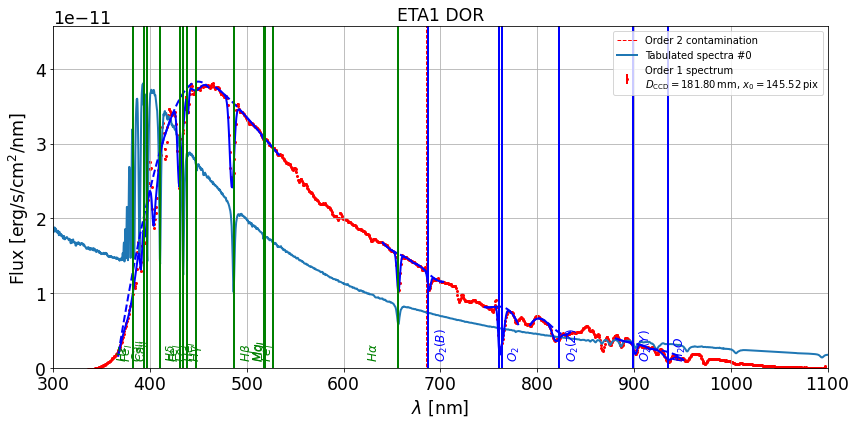

In [65]:
s.plot_spectrum(force_lines=True) 

In [66]:
s.lambdas

array([ 301.87130615,  302.57426171,  303.27720652, ..., 1096.33415417,
       1097.00893393, 1097.68367632])

In [67]:
s.data_order2

array([-2401.6125741 , -3060.06604673, -2684.45835604, ...,
           9.76038949,    22.26728406,    30.60123692])

Text(0.5, 1.0, 'Order 2')

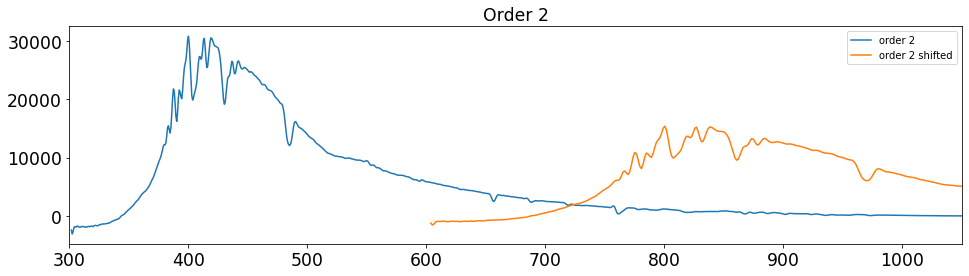

In [68]:
plt.plot(s.lambdas,s.data_order2,label="order 2")
plt.plot(2*s.lambdas,s.data_order2/2,label="order 2 shifted")
plt.xlim(300,1050)
plt.legend()
plt.title("Order 2")

In [69]:
plt.plot(s.lambdas,s.data,label="order 1")
plt.legend()
plt.title("Order 1")

Text(0.5, 1.0, 'Order 1')